<a href="https://colab.research.google.com/github/Nicolas-Nav/DeepLearning/blob/main/DLY0100_Entrega_CNN_Equipo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluación - Redes Convolucionales

**Autor: Nicolas Navarro,
         Gabriela Sandoval**

**Correo Electrónico: ni.navarroa@duocuc.cl,
                      gab.sandoval@duocuc.cl**

**Fecha de Creación:** Mayo de 2025

**Versión:** 1.0  

---

## Descripción

Este notebook contiene el desarrollo de la entrega 2 de la asignatura optativa de Deep Learning de DuocUC Sede Concepción

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- tensorflow (2.18.0)

Para verificar la versión instalada ejecutar usando el siguiente comando, usando la librería de la cual quieres saber la versión:

```bash
import tensorflow as tf
print(tf.__version__)
````

# Introducción

El objetivo de este proyecto es desarrollar un modelo capaz de reconocer personajes de la serie Los Simpsons a partir de imágenes. Para esto se trabajará con redes neuronales convolucionales (CNN), que son especialmente efectivas en tareas de clasificación de imágenes. Se espera que el modelo alcance al menos un 85% de precisión en el conjunto de prueba.

A lo largo del trabajo se probarán distintas arquitecturas, configuraciones y técnicas como el aumento de datos, la normalización y el ajuste de hiperparámetros. Además, se evaluará el rendimiento del modelo utilizando métricas como accuracy, precisión y recall, con el fin de justificar la elección del modelo final.

# Entregable

Utilizando Convolutional Neural Networks con Keras, entrenar un clasificador que sea capaz de reconocer personajes en imágenes de los Simpsons con una accuracy en el dataset de test de **85%**. Redactar un informe analizando varias de las alternativas probadas y los resultados obtenidos.

A continuación se detallan una serie de aspectos orientativos que podrían ser analizados en el informe:

*   Análisis de los datos a utilizar.
*   Análisis de resultados, obtención de métricas de *precision* y *recall* por clase y análisis de qué clases obtienen mejores o peores resultados.
*   Análisis visual de los errores de la red. ¿Qué tipo de imágenes o qué personajes dan más problemas al modelo?
*   Comparación de modelos CNNs con un modelo de Fully Connected para este problema.
*   Utilización de distintas arquitecturas CNNs, comentando aspectos como su profundidad, hiperparámetros utilizados, optimizador, uso de técnicas de regularización, *batch normalization*, entre otras.
*   [ *algo más difícil* ] Utilización de *data augmentation*. Esto puede conseguirse con la clase [ImageDataGenerator](https://keras.io/preprocessing/image/#imagedatagenerator-class) de Keras.

✅ **Notas**
* Recuerda partir los datos en training/validation para tener una buena estimación de los valores que el modelo tendrá en los datos de test, así como comprobar que no estamos cayendo en overfitting.
* No es necesario mostrar en el notebook las trazas de entrenamiento de todos los modelos entrenados, si bien una buena idea seria guardar gráficas de esos entrenamientos para el análisis. Sin embargo, **se debe mostrar el entrenamiento completo del mejor modelo obtenido y la evaluación de los datos de test con este modelo**.
* Las imágenes **no están normalizadas**. Hay que normalizarlas como se ha hecho en trabajos anteriores.
* El test set del problema tiene imágenes un poco más "fáciles", por lo que es posible encontrarse con métricas en el test set bastante mejores que en el training set.

# Descarga de la data

Para comenzar el proyecto, se descargó un archivo comprimido llamado simpsons_train.tar.gz, que contiene imágenes de entrenamiento clasificadas en carpetas según el personaje correspondiente. Este dataset se utiliza para entrenar un modelo de clasificación de imágenes. Cada carpeta representa una clase distinta, lo que facilita la lectura automática de las imágenes y sus etiquetas asociadas mediante herramientas de Keras.

In [ ]:
!wget -O simpsons_train.tar.gz https://www.dropbox.com/scl/fi/qkg3gs31xjbhv9jjqmot6/simpsons_train.tar.gz?rlkey=oqbofdqoqjrpmxjwxaphru0yr&st=b96sg8iu&dl=0

--2025-05-18 22:25:33--  https://www.dropbox.com/scl/fi/qkg3gs31xjbhv9jjqmot6/simpsons_train.tar.gz?rlkey=oqbofdqoqjrpmxjwxaphru0yr
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc879618d1d8fced9c2471ac639.dl.dropboxusercontent.com/cd/0/inline/Cp_7e3EtKQeLAcZfOOR1c2sJETWApex86P_KOdxjqHTHX76V_ZxmW7pj5XhEWM6efI7vKHmVvvXnxXf9VMz381n1NIruMx2SionLQnwkMhdGlJ8Mohu8lWKfJAxWbbsg4swo8O6e63zLSFlIssQS7Yc-/file# [following]
--2025-05-18 22:25:33--  https://ucc879618d1d8fced9c2471ac639.dl.dropboxusercontent.com/cd/0/inline/Cp_7e3EtKQeLAcZfOOR1c2sJETWApex86P_KOdxjqHTHX76V_ZxmW7pj5XhEWM6efI7vKHmVvvXnxXf9VMz381n1NIruMx2SionLQnwkMhdGlJ8Mohu8lWKfJAxWbbsg4swo8O6e63zLSFlIssQS7Yc-/file
Resolving ucc879618d1d8fced9c2471ac639.dl.dropboxusercontent.com (ucc879618d1d8fced9c2471ac639.dl.dropboxusercontent.com)... 162.125.5.1

A continuación, se descargó otro archivo comprimido denominado simpsons_test.tar.gz. Este archivo contiene imágenes que se utilizarán para evaluar el rendimiento del modelo una vez entrenado. (test)

In [ ]:
!wget -O simpsons_test.tar.gz https://www.dropbox.com/scl/fi/zche5dm3zgd9jysatnmka/simpsons_test.tar.gz?rlkey=iek183gc4t4w9mdnz1izhudni&st=qau98qns&dl=0

--2025-05-18 22:25:47--  https://www.dropbox.com/scl/fi/zche5dm3zgd9jysatnmka/simpsons_test.tar.gz?rlkey=iek183gc4t4w9mdnz1izhudni
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc14947eba98867865b695fb856c.dl.dropboxusercontent.com/cd/0/inline/Cp9dnufE_NlyRBpSHYcfRd_XxLv2i_uQPJ2uIstXeJnppFNUpVxcTKkrUsLVSjfOpuUeZkjpXWyfwHaOvMjiNUa3W3aD9gAdUTzqIDJTZjsAh7raGJeb-3lncRG3GFfSORETWQBae-nltv8-r2f7jDjy/file# [following]
--2025-05-18 22:25:48--  https://uc14947eba98867865b695fb856c.dl.dropboxusercontent.com/cd/0/inline/Cp9dnufE_NlyRBpSHYcfRd_XxLv2i_uQPJ2uIstXeJnppFNUpVxcTKkrUsLVSjfOpuUeZkjpXWyfwHaOvMjiNUa3W3aD9gAdUTzqIDJTZjsAh7raGJeb-3lncRG3GFfSORETWQBae-nltv8-r2f7jDjy/file
Resolving uc14947eba98867865b695fb856c.dl.dropboxusercontent.com (uc14947eba98867865b695fb856c.dl.dropboxusercontent.com)... 162.125.5.15

Una vez descargado el archivo simpsons_train.tar.gz, se utilizó el comando tar -xzvf para descomprimirlo. Este comando extrae todos los archivos contenidos en el archivo comprimido, permitiendo acceder a las imágenes de entrenamiento que fueron organizadas previamente en carpetas por personaje. De esta manera, los datos quedan listos para ser cargados y utilizados en el entrenamiento del modelo.

In [ ]:
!tar -xzvf simpsons_train.tar.gz

Se truncaron las últimas líneas 5000 del resultado de transmisión.
simpsons/mayor_quimby/pic_0116.jpg
simpsons/milhouse_van_houten/pic_0576.jpg
simpsons/lenny_leonard/pic_0149.jpg
simpsons/kent_brockman/pic_0446.jpg
simpsons/nelson_muntz/pic_0060.jpg
simpsons/krusty_the_clown/pic_0838.jpg
simpsons/homer_simpson/pic_0637.jpg
simpsons/homer_simpson/pic_0495.jpg
simpsons/krusty_the_clown/pic_0893.jpg
simpsons/homer_simpson/pic_0834.jpg
simpsons/homer_simpson/pic_0692.jpg
simpsons/lisa_simpson/pic_0755.jpg
simpsons/marge_simpson/pic_0654.jpg
simpsons/chief_wiggum/pic_0344.jpg
simpsons/lisa_simpson/pic_0952.jpg
simpsons/lisa_simpson/pic_1269.jpg
simpsons/marge_simpson/pic_0851.jpg
simpsons/marge_simpson/pic_1168.jpg
simpsons/chief_wiggum/pic_0541.jpg
simpsons/homer_simpson/pic_1948.jpg
simpsons/sideshow_bob/pic_0104.jpg
simpsons/lisa_simpson/pic_0278.jpg
simpsons/nelson_muntz/pic_0128.jpg
simpsons/marge_simpson/pic_0177.jpg
simpsons/milhouse_van_houten/pic_0699.jpg
simpsons/waylon_smithers/

Este comando descomprime el archivo simpsons_test.tar.gz, extrayendo las imágenes contenidas en él en una carpeta llamada simpsons_testset. Las imágenes no están organizadas en subcarpetas, sino directamente en esta carpeta. Estas imágenes se usarán para evaluar el rendimiento del modelo, realizando predicciones sobre un conjunto de datos que no se ha utilizado en el entrenamiento.

In [ ]:
!tar -xzvf simpsons_test.tar.gz

simpsons_testset/charles_montgomery_burns_46.jpg
simpsons_testset/marge_simpson_35.jpg
simpsons_testset/abraham_grampa_simpson_9.jpg
simpsons_testset/krusty_the_clown_40.jpg
simpsons_testset/apu_nahasapeemapetilon_10.jpg
simpsons_testset/homer_simpson_24.jpg
simpsons_testset/lenny_leonard_17.jpg
simpsons_testset/marge_simpson_3.jpg
simpsons_testset/milhouse_van_houten_13.jpg
simpsons_testset/apu_nahasapeemapetilon_29.jpg
simpsons_testset/lenny_leonard_34.jpg
simpsons_testset/bart_simpson_27.jpg
simpsons_testset/ned_flanders_12.jpg
simpsons_testset/charles_montgomery_burns_3.jpg
simpsons_testset/milhouse_van_houten_30.jpg
simpsons_testset/apu_nahasapeemapetilon_46.jpg
simpsons_testset/mayor_quimby_3.jpg
simpsons_testset/kent_brockman_6.jpg
simpsons_testset/chief_wiggum_25.jpg
simpsons_testset/nelson_muntz_37.jpg
simpsons_testset/moe_szyslak_28.jpg
simpsons_testset/bart_simpson_44.jpg
simpsons_testset/homer_simpson_36.jpg
simpsons_testset/milhouse_van_houten_49.jpg
simpsons_testset/comic

# Importaciones

Para el desarrollo del modelo de clasificación de imágenes, se realizan una serie de importaciones que permiten manejar los datos, construir y entrenar la red neuronal, y visualizar los resultados. Estas herramientas facilitan desde la carga y preprocesamiento de las imágenes hasta la optimización y evaluación del modelo, permitiendo así implementar el flujo de trabajo de manera eficiente y organizada. A continuación, se detallan las importaciones utilizadas en el proyecto.

In [ ]:
import cv2, os, pprint
import numpy as np
import keras
import glob
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import collections
import tensorflow as tf
import itertools

import keras
from google.colab.patches import cv2_imshow
from tensorflow.keras import layers
from tensorflow.keras import Model
from keras.models import Sequential
from keras.layers import Input, Dense, Activation , Dropout, Flatten, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from tensorflow.python.keras import backend as keras_backend

from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from collections import Counter
import random

from matplotlib import pyplot as plt
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Input

Se utilizó numpy y pandas para la manipulación eficiente de datos numéricos y estructurados, mientras que Matplotlib se empleó para la visualización de resultados y métricas de entrenamiento. OpenCV (cv2) fue clave para la lectura y procesamiento de imágenes, y glob facilitó la exploración masiva de archivos en el sistema. Se hizo uso de collections para contar elementos (como la cantidad de imágenes por clase) de manera rápida, y de random e itertools para operaciones adicionales de muestreo y combinación. En cuanto al desarrollo del modelo, se usó TensorFlow y Keras por su simplicidad y potencia para construir redes convolucionales utilizando capas como Conv2D, MaxPooling2D, Dense, Dropout, y BatchNormalization. Además, se importo el optimizador Adam para  ajuste de pesos. ImageDataGenerator se integró para aplicar técnicas de Data Augmentation con el fin de mejorar la capacidad de generalización del modelo. Finalmente, se utilizó scikit-learn (train_test_split) para dividir el conjunto de datos. Estas herramientas en conjunto proporcionan un entorno completo y flexible para llevar a cabo un proyecto de deep learning aplicado a visión por computadora.

#Funciones

Esta función del código a continuación, permite visualizar la evolución del entrenamiento de un modelo Keras. Utiliza los datos guardados en el objeto History para graficar dos subgráficas: una con la pérdida (loss) y otra con la precisión (accuracy) tanto del conjunto de entrenamiento como de validación, a lo largo de las épocas. Esta visualización es importante para entender cómo aprende el modelo, si mejora de forma estable o si cae en problemas como el sobreajuste. Gracias a estas gráficas, se pueden tomar decisiones informadas sobre ajustes al modelo o a la estrategia de entrenamiento.

In [ ]:
import matplotlib.pyplot as plt

def graficar_historial_entrenamiento(hist):
    """
    Grafica la pérdida y la precisión del entrenamiento y validación a lo largo de las épocas.

    Parámetros:
    hist -- Objeto History devuelto por el método fit() de un modelo Keras.

    ###Dejo el comentario igual como lo hace la profe en sus notes
    """
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))
    epocas = range(1, len(hist.history['loss']) + 1)

    axs[0].plot(epocas, hist.history['loss'], label="train")
    axs[0].plot(epocas, hist.history['val_loss'], label="test")
    axs[0].set_title('Pérdida', fontsize=14, fontweight="bold")
    axs[0].set_xlabel('Época', fontsize=12, fontweight="bold")
    axs[0].legend()

    axs[1].plot(epocas, hist.history['accuracy'], label="train")
    axs[1].plot(epocas, hist.history['val_accuracy'], label="test")
    axs[1].set_title('% Acierto', fontsize=14, fontweight="bold")
    axs[1].set_xlabel('Época', fontsize=12, fontweight="bold")
    axs[1].legend()

    plt.tight_layout()
    plt.show()

La función crear df métricas, genera un resumen tabular de las métricas finales del entrenamiento, es decir, los valores alcanzados en la última época. Recibe como entrada el historial (hist) generado por el entrenamiento de un modelo Keras y opcionalmente un nombre identificador del modelo. La salida es un DataFrame de pandas que muestra las métricas (accuracy, loss, val_accuracy, val_loss, etc.) junto a sus respectivos valores finales. Esta tabla es útil para documentar y comparar el rendimiento entre diferentes modelos de forma clara y organizada.

In [ ]:
def crear_df_metricas(hist, nombre_red="Red"):
    """
    Crea un DataFrame con las métricas finales o de la epoca final del historial de entrenamiento.

    Parámetros:
    hist -- Objeto History devuelto por el método fit() de un modelo Keras.
    nombre_red -- Nombre identificador de la red, usado como encabezado de la columna de métricas.

    Retorna:
    Un DataFrame con los nombres de las métricas y sus valores finales.
    """
    metricas = {
        'Métrica': list(hist.history.keys()),
        nombre_red: [hist.history[k][-1] for k in hist.history],
    }

    df_metricas = pd.DataFrame(metricas)
    display(df_metricas)
    return df_metricas


La función que continua, es para gráficar, ya que facilita la comparación visual de múltiples modelos entrenados. Recibe una lista de historiales de entrenamiento y una lista con los nombres correspondientes a cada modelo. A partir de ahí, extrae las métricas más relevantes (accuracy, val_accuracy, loss, val_loss) y genera un gráfico de barras agrupadas, donde se puede ver fácilmente qué modelo tuvo mejor desempeño. También devuelve un DataFrame con los valores finales de cada métrica por modelo. Es ideal para hacer análisis comparativos entre distintas configuraciones de red o estrategias de entrenamiento.

In [ ]:
def graficar_comparacion_modelos(historiales, nombres_modelos):
    """
    Crea un gráfico de barras comparando métricas finales (accuracy, val_accuracy, loss, val_loss) de varios modelos.

    Parámetros:
    historiales -- Lista de objetos history (dict o hist.history de Keras).
    nombres_modelos -- Lista de nombres que identifican a cada modelo (str), en el mismo orden que los historiales.
    """
    if len(historiales) != len(nombres_modelos):
        raise ValueError("Las listas de historiales y nombres de modelos deben tener la misma longitud.")

    metricas = ['accuracy', 'val_accuracy', 'loss', 'val_loss']
    nombres_metricas = ['Accuracy', 'Val Accuracy', 'Loss', 'Val Loss']

    data = {'Métrica': nombres_metricas}

    for nombre, hist in zip(nombres_modelos, historiales):
        valores = [hist[m][-1] if m in hist else None for m in metricas]
        data[nombre] = valores

    df_comparacion = pd.DataFrame(data)

    # Configuración del gráfico
    plt.figure(figsize=(18, 6))
    bar_width = 0.8 / len(nombres_modelos)
    index = range(len(nombres_metricas))

    # Dibujar las barras para cada modelo
    for i, nombre in enumerate(nombres_modelos):
        posiciones = [j + (i - len(nombres_modelos)/2) * bar_width + bar_width/2 for j in index]
        barras = plt.bar(posiciones, df_comparacion[nombre], bar_width, label=nombre)
        for bar in barras:
            height = bar.get_height()
            if height is not None:
                plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.4f}', ha='center', va='bottom', fontsize=8)

    # Etiquetas y título
    plt.xlabel('Métrica')
    plt.ylabel('Valor')
    plt.title('Comparación de Métricas entre Modelos')
    plt.xticks(index, nombres_metricas, rotation=45)
    plt.legend(title='Modelos', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    return df_comparacion


la función métricas recibe como entrada el historial de entrenamiento (history) devuelto por el método .fit() de un modelo Keras y devuelve un diccionario con las métricas finales (última época) del entrenamiento y validación

In [ ]:
def metricas(history):
    return {
        'Train Accuracy': f"{history.history['accuracy'][-1]:.4f}",
        'Validation Accuracy': f"{history.history['val_accuracy'][-1]:.4f}",
        'Train Loss': f"{history.history['loss'][-1]:.4f}",
        'Validation Loss': f"{history.history['val_loss'][-1]:.4f}"
    }

Ahora, se definen dos funciones, load_train_set y load_test_set, cuyo propósito es cargar imágenes desde un directorio (de entrenamiento o prueba), redimensionarlas a un tamaño uniforme (IMG_SIZE x IMG_SIZE) utilizando OpenCV, y convertirlas en arrays numpy listos para ser usados en modelos de deep learning. La función load_train_set recorre las carpetas de cada personaje (clase), redimensiona sus imágenes .jpg y asocia cada una a su respectiva etiqueta numérica (label) según un diccionario map_characters. Por otro lado, load_test_set toma imágenes sueltas desde una carpeta de test, deduce a qué personaje pertenecen a partir del nombre del archivo, y les asigna la etiqueta correspondiente usando un diccionario invertido. Ambas funciones permiten visualizar detalles del proceso si el parámetro verbose está activado, y devuelven los arrays X (con imágenes) y Y (con etiquetas).

In [ ]:
def load_train_set(dirname : str, map_characters : np.array, verbose=True):
    """Esta función carga los datos de training en imágenes.

    Como las imágenes tienen tamaños distintas, utilizamos la librería opencv
    para hacer un resize y adaptarlas todas a tamaño IMG_SIZE x IMG_SIZE.

    Args:
        dirname: directorio completo del que leer los datos
        map_characters: variable de mapeo entre labels y personajes
        verbose: si es True, muestra información de las imágenes cargadas

    Returns:
        X, y: X es un array con todas las imágenes cargadas con tamaño
                IMG_SIZE x IMG_SIZE
              y es un array con las labels de correspondientes a cada imagen
    """
    X_train = []
    y_train = []
    for label, character in map_characters.items():
        files = os.listdir(os.path.join(dirname, character))
        images = [file for file in files if file.endswith("jpg")]
        if verbose:
          print("Leyendo {} imágenes encontradas de {}".format(len(images), character))
        for image_name in images:
            image = cv2.imread(os.path.join(dirname, character, image_name))
            X_train.append(cv2.resize(image,(IMG_SIZE, IMG_SIZE)))
            y_train.append(label)
    return np.array(X_train), np.array(y_train)

def load_test_set(dirname : str, map_characters : np.array, verbose=True):
    """Esta función funciona de manera equivalente a la función load_train_set
    pero cargando los datos de test."""
    X_test = []
    y_test = []
    reverse_dict = {v: k for k, v in map_characters.items()}
    for filename in glob.glob(dirname + '/*.*'):
        char_name = "_".join(filename.split('/')[-1].split('_')[:-1])
        if char_name in reverse_dict:
            image = cv2.imread(filename)
            image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
            X_test.append(image)
            y_test.append(reverse_dict[char_name])
    if verbose:
        print("Leídas {} imágenes de test".format(len(X_test)))
    return np.array(X_test), np.array(y_test)

# Preprocesamiento de los Datos

En este paso del proceso, se lleva a cabo el preprocesamiento de los datos para prepararlos para el modelo de clasificación. Se cargan las imágenes desde los directorios correspondientes, se ajustan a un tamaño uniforme y se asignan las etiquetas correctas para cada imagen, lo cual es esencial para que el modelo pueda aprender de manera eficiente y precisa.

Ahora, se define un mapeo entre las clases y los personajes del dataset, limitándose a los 18 personajes más representativos del conjunto de datos, cada uno asignado a un número de clase. Además, se especifica que todas las imágenes serán redimensionadas a un tamaño uniforme de 64x64 píxeles, asegurando que las entradas para el modelo de clasificación tengan dimensiones consistentes y adecuadas para su procesamiento eficiente.

In [ ]:
# Esta variable contiene un mapeo de número de clase a personaje.
# Se utilizan sólo los 18 personajes del dataset que tienen más imágenes.
MAP_CHARACTERS = {
    0: 'abraham_grampa_simpson', 1: 'apu_nahasapeemapetilon', 2: 'bart_simpson',
    3: 'charles_montgomery_burns', 4: 'chief_wiggum', 5: 'comic_book_guy', 6: 'edna_krabappel',
    7: 'homer_simpson', 8: 'kent_brockman', 9: 'krusty_the_clown', 10: 'lisa_simpson',
    11: 'marge_simpson', 12: 'milhouse_van_houten', 13: 'moe_szyslak',
    14: 'ned_flanders', 15: 'nelson_muntz', 16: 'principal_skinner', 17: 'sideshow_bob'
}

# Se estandarizan todas las imágenes a tamaño 64x64
IMG_SIZE = 64

En este paso, se procede a cargar los conjuntos de datos de entrenamiento y prueba, que contienen las imágenes clasificadas por personajes. Se utiliza la función load_train_set para cargar las imágenes de entrenamiento, y load_test_set para cargar las imágenes de prueba. Ambas funciones se encargan de recorrer las carpetas de las imágenes, redimensionarlas al tamaño estándar (64x64 píxeles) y asignarles las etiquetas correspondientes según el mapeo previamente definido

In [ ]:
# Carga los datos
DATASET_TRAIN_PATH_COLAB = "simpsons"
DATASET_TEST_PATH_COLAB = "simpsons_testset"

X, y = load_train_set(DATASET_TRAIN_PATH_COLAB, MAP_CHARACTERS)
X_test, y_test = load_test_set(DATASET_TEST_PATH_COLAB, MAP_CHARACTERS)

Leyendo 913 imágenes encontradas de abraham_grampa_simpson
Leyendo 623 imágenes encontradas de apu_nahasapeemapetilon
Leyendo 1342 imágenes encontradas de bart_simpson
Leyendo 1193 imágenes encontradas de charles_montgomery_burns
Leyendo 986 imágenes encontradas de chief_wiggum
Leyendo 469 imágenes encontradas de comic_book_guy
Leyendo 457 imágenes encontradas de edna_krabappel
Leyendo 2246 imágenes encontradas de homer_simpson
Leyendo 498 imágenes encontradas de kent_brockman
Leyendo 1206 imágenes encontradas de krusty_the_clown
Leyendo 1354 imágenes encontradas de lisa_simpson
Leyendo 1291 imágenes encontradas de marge_simpson
Leyendo 1079 imágenes encontradas de milhouse_van_houten
Leyendo 1452 imágenes encontradas de moe_szyslak
Leyendo 1454 imágenes encontradas de ned_flanders
Leyendo 358 imágenes encontradas de nelson_muntz
Leyendo 1194 imágenes encontradas de principal_skinner
Leyendo 877 imágenes encontradas de sideshow_bob
Leídas 890 imágenes de test


Total de imágenes de entrenamiento y test: 18992 imágenes

Total de imágenes de prueba: 890 imágenes


#¿Qué tipo de imágenes o qué personajes dan más problemas al modelo?

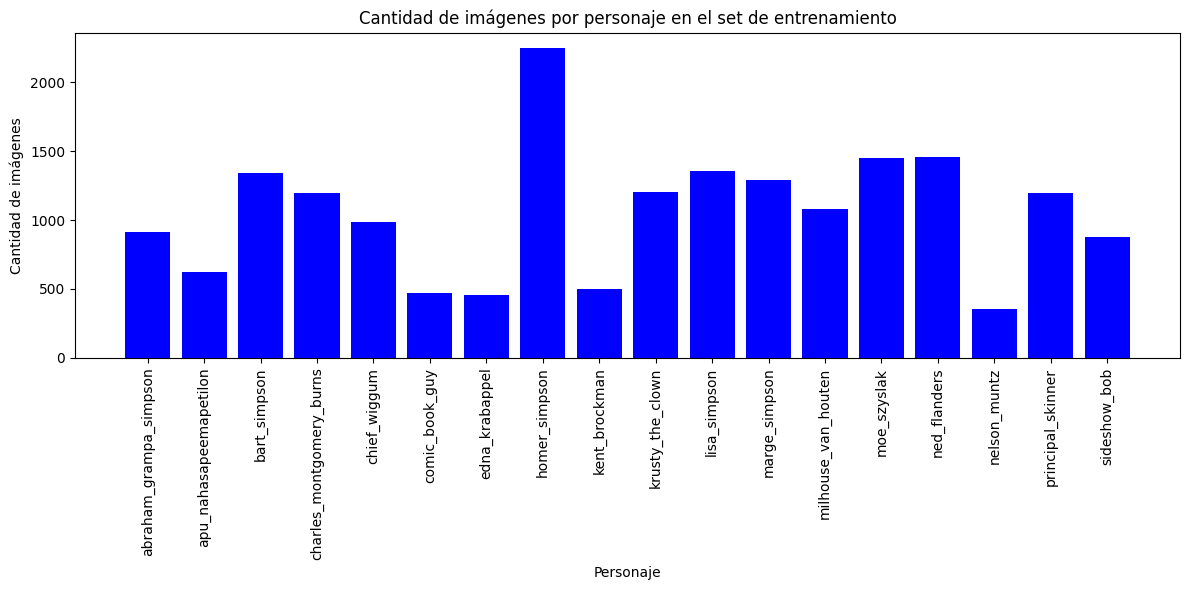

In [ ]:
cantidad_por_personaje = collections.Counter(y)
nombres = [MAP_CHARACTERS[a] for a in cantidad_por_personaje.keys()]
cantidad = list(cantidad_por_personaje.values())

plt.figure(figsize=(12, 6))
plt.bar(nombres, cantidad, color='blue')
plt.xticks(rotation=90)
plt.title("Cantidad de imágenes por personaje en el set de entrenamiento")
plt.xlabel("Personaje")
plt.ylabel("Cantidad de imágenes")
plt.tight_layout()
plt.show()

Existen problemas en la distribución de las imágenes, ya que algunas clases, como la de homer_simpson, cuentan con más de 2,000 ejemplares, mientras que otras, como nelson_muntz, tienen menos de 500 imágenes. Esto podría generar dificultades en el entrenamiento, ya que las clases con pocos ejemplos podrían no ser identificadas correctamente por el modelo, lo que podría llevar a resultados inexactos.

Otras imagenes puede ser personajes que fisicamente se puedan parecer como homero simson y el chico de las historietas el modelo podria mal interpretarlos por la forma de estos personajes, tambien si en las imagenes aparece 2 personajes.

Para mejorar esta distribución, se utilizará la técnica de data augmentation. Esta técnica genera variantes de una imagen original mediante transformaciones como rotaciones, volteos, escalado y otras modificaciones. El uso de data augmentation permite crear más ejemplos de las clases con menos imágenes, lo que ayuda a entrenar modelos más robustos y a evitar problemas de sobreentrenamiento, asegurando una mejor generalización del modelo.

Se define la copia de los datos para proceder a trabajar con ellos sin data augmentation

In [ ]:
# Copia de los datos originales
X_original = X.copy()
y_original = y.copy()

Ahora, para evitar sesgos en los datos y garantizar una distribución aleatoria tanto en el conjunto de entrenamiento como en el conjunto de validación, se barajan aleatoriamente las imágenes. Si no se realiza este paso, al separar el 20% de los datos para validación, podría ser que se estén utilizando solo un pequeño número de personajes.

El primer código baraja los datos sin data augmentation, mientras que el segundo bloque baraja los datos con data augmentation. En ambos casos, se asegura que el conjunto de datos esté completamente desordenado para mejorar la generalización del modelo durante el entrenamiento

In [ ]:
# Se va a barajar aleatoriamente los datos. Esto es importante ya que si no
# se realiza y, por ejemplo, se escogen el 20% de los datos finales como validation
# set, se estará utilizando solo un pequeño número de personajes, ya que
# las imágenes se leen secuencialmente personaje a personaje.

#datos sin data augmentation
perm_orig = np.random.permutation(len(X_original))
X_noaug = X_original[perm_orig]
y_noaug = y_original[perm_orig]

In [ ]:
#Datos con data augmentation
perm = np.random.permutation(len(X))
X, y = X[perm], y[perm]

Una vez que hemos aplicado la técnica de data augmentation y realizado la aleatoridad de los datos, el siguiente paso es separar el conjunto de datos de entrenamiento en dos subconjuntos: uno para entrenamiento y otro para validación. Utilizando la función train_test_split, se divide un 80% de los datos para entrenamiento y un 20% para validación tanto para los datos sin data augmentation como para los datos con data augmentation.

En este código, también se calcula y muestra el número total de imágenes de entrenamiento, validación y prueba, así como las dimensiones de cada conjunto y el número de canales de color para las imágenes. Se verifica que los tamaños de los conjuntos sean correctos y se asegura que la resolución de las imágenes coincida con las especificaciones previas.

Esto se realiza para garantizar que los datos estén organizados correctamente antes de entrenar y evaluar el modelo.

In [ ]:
# Separa el conjunto de datos de entrenamiento en entrenamiento y validación con 20% con datos sin data augmentation
X_train_noaug, X_val_noaug, y_train_noaug, y_val_noaug = train_test_split(X_noaug, y_noaug, test_size=0.2, random_state=29)

# Variables con nÚmero de elementos
X_train_num_elem = X_train_noaug.shape[0]
X_val_num_elem = X_val_noaug.shape[0]
X_test_num_elem = X_test.shape[0]

# Dimensiones
img_rows = IMG_SIZE
img_cols = IMG_SIZE
img_channels = X.shape[3]

# Número de categorías
num_categ = len(MAP_CHARACTERS)

# Comprueba que efectivamente los resultados son los esperados
print("Número de imágenes de anterior training : ", X_noaug.shape[0])
print("Número de imágenes de training (80% de anterior train) : ", X_train_num_elem)
print("Número de imágenes de validación (20% de anterior train) : ", X_val_num_elem)
print("Número de imágenes de test : ", X_test_num_elem)
print("="*15)
print("Número de resultados de anterior training : ", y_noaug.shape[0])
print("Número de resultados de training (80% de anterior train) : ", y_train_noaug.shape[0])
print("Número de resultadoss de validación (20% de anterior train) : ", y_val_noaug.shape[0])
print("Número de resultados de test : ", y_test.shape[0])
print("="*15)
print("Dimensiones de training : ", X_train_noaug.shape)
print("Dimensiones de validation : ", X_val_noaug.shape)
print("Dimensiones de tests : ", X_test.shape)
print("="*15)
print("Canales de color para las imagenes : ", img_channels)
print("Resolución imágenes de anterior training : ", X.shape[1], "x", X.shape[2])
print("Resolución imágenes de training (80% de anterior train) : ", X_train_noaug.shape[1], "X", X_train_noaug.shape[2])
print("Resolución imágenes de validación (20% de anterior train) : ", X_val_noaug.shape[1], "x", X_val_noaug.shape[2])
print("Resolución imágenes de test : ", X_test.shape[1], "x", X_test.shape[2])

Número de imágenes de anterior training :  18992
Número de imágenes de training (80% de anterior train) :  15193
Número de imágenes de validación (20% de anterior train) :  3799
Número de imágenes de test :  890
Número de resultados de anterior training :  18992
Número de resultados de training (80% de anterior train) :  15193
Número de resultadoss de validación (20% de anterior train) :  3799
Número de resultados de test :  890
Dimensiones de training :  (15193, 64, 64, 3)
Dimensiones de validation :  (3799, 64, 64, 3)
Dimensiones de tests :  (890, 64, 64, 3)
Canales de color para las imagenes :  3
Resolución imágenes de anterior training :  64 x 64
Resolución imágenes de training (80% de anterior train) :  64 X 64
Resolución imágenes de validación (20% de anterior train) :  64 x 64
Resolución imágenes de test :  64 x 64


Verificamos como quedan las x e y de entrenamiento y validacion. En entrenamiento contamos con 15193 datos y para validacion 3799. Por ultimo para test tenemos 890 imagenes.

#Distribución sin data aug en entrenamiento

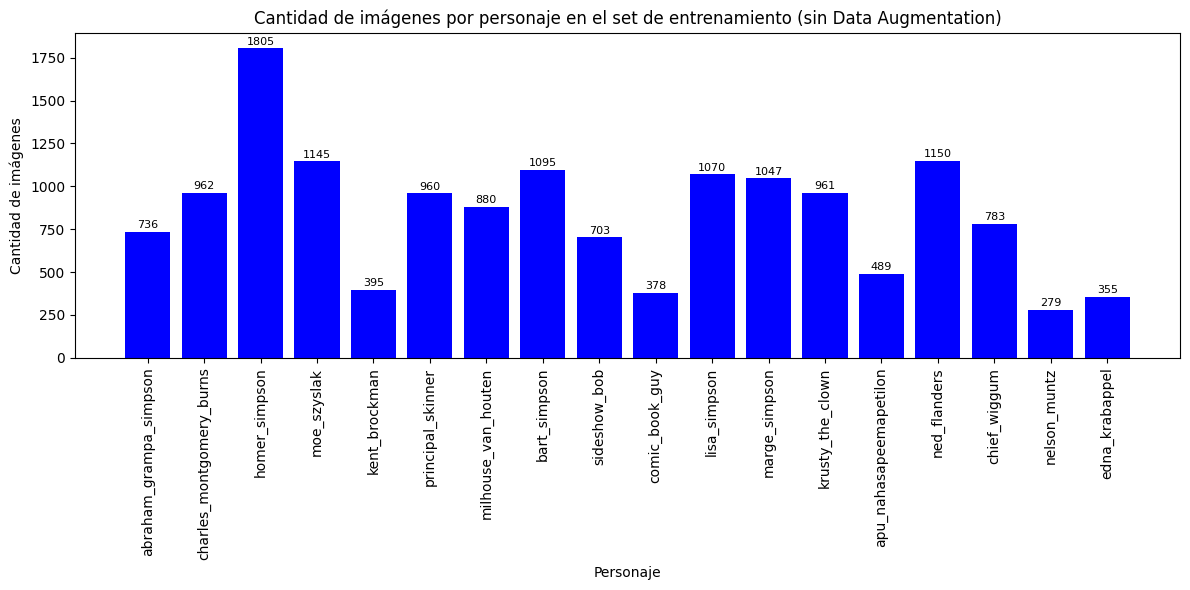

In [ ]:
cantidad_por_personaje_train_noaug = collections.Counter(y_train_noaug.ravel())
nombres = [MAP_CHARACTERS[a] for a in cantidad_por_personaje_train_noaug.keys()]
cantidad = list(cantidad_por_personaje_train_noaug.values())

plt.figure(figsize=(12, 6))
bars = plt.bar(nombres, cantidad, color='blue')
plt.xticks(rotation=90)
plt.title("Cantidad de imágenes por personaje en el set de entrenamiento (sin Data Augmentation)")
plt.xlabel("Personaje")
plt.ylabel("Cantidad de imágenes")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 10, int(yval), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


Asi queda la distribución de clases despues de separar el 80% de entrenamiento y el 20% para validación del data set sin data augmentation

#Aplicando data augmentation

A continuación, se implementa la técnica de data augmentation para generar imágenes adicionales en las clases con ejemplos y solo en el conjunto de entrenamiento. A través de transformaciones como rotaciones, desplazamientos y escalados, se amplía la diversidad del conjunto de entrenamiento. Esto permite equilibrar la cantidad de datos entre las clases, lo que favorece una mejor capacidad de generalización del modelo y optimiza su desempeño en las clases menos representadas. Al finalizar, las imágenes aumentadas se combinan con las originales para obtener un conjunto de datos balanceado.

Al aplicar la técnica de data augmentation, se busca equilibrar la cantidad de imágenes en cada clase. En este caso, la clase con más imágenes después de la augmentación es la clase 7, correspondiente a homer_simpson, que cuenta con un total de 1805 imágenes. Las demás clases generaron nuevas imágenes hasta alcanzar esta cantidad, asegurando que todas las clases tengan 1805 imágenes.

Como resultado, el número total de imágenes de entrenamiento es ahora de 32490.

In [ ]:
X_train_noaug, X_val_noaug, y_train_noaug, y_val_noaug = train_test_split(X_noaug, y_noaug, test_size=0.2, random_state=29)

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.05,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

class_counts = Counter(y_train_noaug)
max_count = max(class_counts.values())

X_augmented = []
y_augmented = []

for class_label, count in class_counts.items():
    n_to_generate = max_count - count
    if n_to_generate > 0:
        print(f"Aumentando clase {class_label} ({MAP_CHARACTERS[class_label]}): generando {n_to_generate} imágenes...")
        class_indices = np.where(y_train_noaug == class_label)[0]
        class_images = X_train_noaug[class_indices]
        for _ in range(n_to_generate):
            img = random.choice(class_images)
            img = np.expand_dims(img, axis=0)
            augmented_img = next(datagen.flow(img, batch_size=1))[0].astype('uint8')
            X_augmented.append(augmented_img)
            y_augmented.append(class_label)

X_train = np.concatenate([X_train_noaug, np.array(X_augmented)], axis=0)
y_train = np.concatenate([y_train_noaug, np.array(y_augmented)], axis=0)

perm = np.random.permutation(len(X_train))
X_train = X_train[perm]
y_train = y_train[perm]

X_val = X_val_noaug
y_val = y_val_noaug

Aumentando clase 0 (abraham_grampa_simpson): generando 1069 imágenes...
Aumentando clase 3 (charles_montgomery_burns): generando 843 imágenes...
Aumentando clase 13 (moe_szyslak): generando 660 imágenes...
Aumentando clase 8 (kent_brockman): generando 1410 imágenes...
Aumentando clase 16 (principal_skinner): generando 845 imágenes...
Aumentando clase 12 (milhouse_van_houten): generando 925 imágenes...
Aumentando clase 2 (bart_simpson): generando 710 imágenes...
Aumentando clase 17 (sideshow_bob): generando 1102 imágenes...
Aumentando clase 5 (comic_book_guy): generando 1427 imágenes...
Aumentando clase 10 (lisa_simpson): generando 735 imágenes...
Aumentando clase 11 (marge_simpson): generando 758 imágenes...
Aumentando clase 9 (krusty_the_clown): generando 844 imágenes...
Aumentando clase 1 (apu_nahasapeemapetilon): generando 1316 imágenes...
Aumentando clase 14 (ned_flanders): generando 655 imágenes...
Aumentando clase 4 (chief_wiggum): generando 1022 imágenes...
Aumentando clase 15 (

In [ ]:
X_train_num_elem = X_train.shape[0]
X_val_num_elem = X_val.shape[0]
X_test_num_elem = X_test.shape[0]

img_rows = IMG_SIZE
img_cols = IMG_SIZE
img_channels = X.shape[3]
num_categ = len(MAP_CHARACTERS)

print("Número de imágenes originales antes de data aug: ", X_noaug.shape[0])
print("Número de imágenes de entrenamiento tras balanceo: ", X_train_num_elem)
print("Número de imágenes de validación: ", X_val_num_elem)
print("Número de imágenes de test: ", X_test_num_elem)
print("="*15)
print("Número de etiquetas originales: ", y_noaug.shape[0])
print("Número de etiquetas en entrenamiento: ", y_train.shape[0])
print("Número de etiquetas en validación: ", y_val.shape[0])
print("Número de etiquetas en test: ", y_test.shape[0])
print("="*15)
print("Dimensiones de X_train: ", X_train.shape)
print("Dimensiones de X_val: ", X_val.shape)
print("Dimensiones de X_test: ", X_test.shape)
print("="*15)
print("Canales de color: ", img_channels)
print("Resolución imágenes de entrenamiento: ", X_train.shape[1], "x", X_train.shape[2])
print("Resolución imágenes de validación: ", X_val.shape[1], "x", X_val.shape[2])
print("Resolución imágenes de test: ", X_test.shape[1], "x", X_test.shape[2])

Número de imágenes originales antes de data aug:  18992
Número de imágenes de entrenamiento tras balanceo:  32490
Número de imágenes de validación:  3799
Número de imágenes de test:  890
Número de etiquetas originales:  18992
Número de etiquetas en entrenamiento:  32490
Número de etiquetas en validación:  3799
Número de etiquetas en test:  890
Dimensiones de X_train:  (32490, 64, 64, 3)
Dimensiones de X_val:  (3799, 64, 64, 3)
Dimensiones de X_test:  (890, 64, 64, 3)
Canales de color:  3
Resolución imágenes de entrenamiento:  64 x 64
Resolución imágenes de validación:  64 x 64
Resolución imágenes de test:  64 x 64


#Distribución con data augmentation en entrenamiento

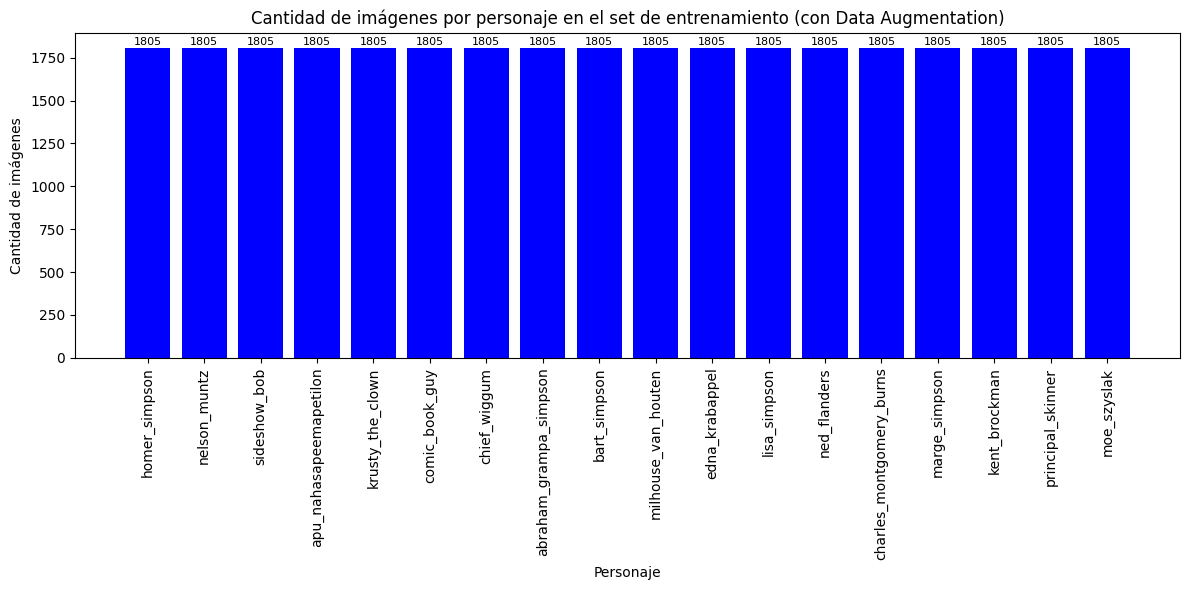

In [ ]:
cantidad_por_personaje_train = collections.Counter(y_train)
nombres = [MAP_CHARACTERS[a] for a in cantidad_por_personaje_train.keys()]
cantidad = list(cantidad_por_personaje_train.values())

plt.figure(figsize=(12, 6))
bars = plt.bar(nombres, cantidad, color='blue')
plt.xticks(rotation=90)
plt.title("Cantidad de imágenes por personaje en el set de entrenamiento (con Data Augmentation)")
plt.xlabel("Personaje")
plt.ylabel("Cantidad de imágenes")

# Añadir valores sobre las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 10, int(yval), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

La técnica de data augmentation se aplicó a todas las clases excepto a la que tenía más imágenes, homer_simpson, con 1805 ejemplos. Para las demás clases, se generaron nuevas imágenes a partir de las existentes mediante rotaciones, recortes y transformaciones. Estas nuevas imágenes son variantes de las que ya estaban en el conjunto de datos original.

#Normalizado y One hot-encoder

A continuación se realiza la normalización de las imágenes tanto para los datos con data augmentation como para los datos sin data augmentation. La normalización se realiza dividiendo los valores de las imágenes entre 255 para que todos los valores estén en el rango [0, 1], lo que ayuda a mejorar el entrenamiento del modelo al hacer que el aprendizaje sea más eficiente.

Además, se aplica la técnica de one-hot encoding a las etiquetas, tanto para los datos con data augmentation como para los datos sin ella. El one-hot encoding transforma las etiquetas de clase en vectores binarios, donde solo la posición correspondiente a la clase es 1, y las demás posiciones son 0. Esto es necesario porque muchos modelos de redes neuronales requieren que las etiquetas estén en este formato para tareas de clasificación multiclase.

Finalmente, se imprime la forma de los conjuntos de entrenamiento, validación y prueba tanto para las imágenes como para las etiquetas para asegurarse de que las dimensiones son las correctas antes de proceder con el entrenamiento del modelo.

In [ ]:
#normalizar sin data augmentation
X_train_noaug = X_train_noaug / 255
X_val_noaug = X_val_noaug / 255
X_test_norm = X_test / 255
print(X_train_noaug.shape, X_val_noaug.shape, X_test_norm.shape)


#aplicar el one-hot sin data augmentation
y_train_noaug = keras.utils.to_categorical(y_train_noaug, 18)
y_val_noaug = keras.utils.to_categorical(y_val_noaug, 18)
y_test_oh = keras.utils.to_categorical(y_test, 18)

print(y_train_noaug.shape, y_val_noaug.shape, y_test_oh.shape)

(15193, 64, 64, 3) (3799, 64, 64, 3) (890, 64, 64, 3)
(15193, 18) (3799, 18) (890, 18)


Tras aplicar la normalización y el one-hot encoding, se obtiene la siguiente estructura final de los datos sin data augmentation:


Datos de entrada (imágenes):

*   Entrenamiento: 15,193 imágenes
*   Validación: 3,799 imágenes
*   Test: 890 imágenes
*   Todas con resolución de 64x64 píxeles y 3 canales de color (RGB)

Etiquetas (one-hot):


*   Entrenamiento: vectores de dimensión 18 para cada imagen
*   Validación: vectores de dimensión 18
*   Test: vectores de dimensión 18





In [ ]:
#normalizar con data augmentation
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255
print(X_train.shape, X_val.shape, X_test.shape)

#aplicar el one-hot con data augmentation
y_train = keras.utils.to_categorical(y_train, 18)
y_val = keras.utils.to_categorical(y_val, 18)
y_test = keras.utils.to_categorical(y_test, 18)

print(y_train.shape, y_val.shape, y_test.shape)

(32490, 64, 64, 3) (3799, 64, 64, 3) (890, 64, 64, 3)
(32490, 18) (3799, 18) (890, 18)




Tras aplicar la normalización y el one-hot encoding, se obtiene la siguiente estructura final de los datos con data augmentation:

Datos de entrada (imágenes):

*   Entrenamiento: 32,490 imágenes
*   Validación: 3,799 imágenes
*   Test: 890 imágenes
*   Todas con resolución de 64x64 píxeles y 3 canales de color (RGB)


Etiquetas (one-hot):

*   Entrenamiento: vectores de dimensión 18 para cada imagen
*   Validación: vectores de dimensión 18
*   Test: vectores de dimensión 18

Estos resultados confirman que los datos están correctamente preparados y listos para entrenar los modelos con y sin aplicar data augmentation.

Este bloque de código se utiliza para liberar memoria RAM eliminando variables que ya no se necesitan. En este caso, se eliminan los conjuntos de datos originales y aumentados (X_original, y_original, X_augmented, y_augmented) una vez que ya han sido procesados y no se usarán más. Luego, se llama al recolector de basura (gc.collect()) para forzar la liberación de la memoria ocupada por esos datos, optimizando así el uso de recursos durante el entrenamiento de los modelos.

In [ ]:
import gc
del X_original
del y_original
del X_augmented
del y_augmented
gc.collect()

En esta etapa se procederá a definir y entrenar una serie de modelos de redes neuronales con el objetivo de clasificar imágenes de personajes de la serie Los Simpson. El enfoque adoptado contempla partir con un modelo base sin aplicar técnicas de data augmentation, seguido por cinco modelos adicionales que sí incorporan dicha técnica, manteniendo inicialmente la misma arquitectura base y luego aumentando progresivamente la complejidad de la red.

El modelo base será una red neuronal convolucional con la siguiente arquitectura:

*   1 capa convolucional (Conv2D) para extracción de características.
*   1 capa de pooling (MaxPooling2D) para reducción de dimensionalidad.
*   5 capas densas ocultas
*   Dropout aplicado en las capas ocultas para prevenir el sobreajuste.

Este modelo será entrenado con los datos originales, sin modificaciones.

A continuación, se entrenará un segundo modelo con data augmentation, manteniendo exactamente la misma arquitectura que el modelo base. Esto permitirá evaluar el impacto del data augmentation sin la influencia de cambios estructurales en la red.

Posteriormente, se desarrollarán cuatro modelos adicionales con data augmentation, los cuales incorporarán progresivamente las siguientes mejoras:

*   Agregar más capas convolucionales y de pooling.
*   Reducir gradualmente el número de capas densas, ya que la extracción de características recaerá en las capas convolucionales.
*   Incorporar Batch Normalization como última mejora, para estabilizar y acelerar el proceso de entrenamiento.

Cada modelo será evaluado mediante:

*   Métricas de desempeño en los conjuntos de validación y prueba: accuracy, recall y precision.
*   Curvas de aprendizaje que permitirán visualizar la evolución del accuracy y la loss por época.

Este enfoque permitirá analizar el efecto del data augmentation y la complejidad arquitectónica en la capacidad de generalización y desempeño de los modelos entrenados.

## Configuración común para todos los modelos

Cada modelo se entrena utilizando una configuración de hiperparámetros común, seleccionados para equilibrar precisión, velocidad de convergencia y estabilidad durante el aprendizaje:

Optimizador: Adam
Se utiliza el optimizador Adam ya que es eficiente computacionalmente, requiere poca memoria y se adapta bien a problemas con grandes cantidades de datos y parámetros, como las redes neuronales convolucionales.

Función de activación (capas ocultas): Relu
La función de activación Relu se elige porque introduce no linealidad de forma eficiente y ayuda a evitar el problema del gradiente, permitiendo que las redes profundas aprendan patrones complejos.

Función de activación (capa de salida): Softmax
Se usa softmax en la capa de salida porque el problema es de clasificación multiclase. Esta función convierte los valores de salida en probabilidades que suman 1, lo que permite interpretar cada salida como la probabilidad de pertenencia a una clase.

Función de pérdida: categorical_crossentropy
Dado que las etiquetas están codificadas en one-hot y se trata de un problema de clasificación con más de dos clases, la función categorical_crossentropy es la más adecuada para calcular la pérdida entre las predicciones y las clases reales.

#MODELOS SIN DATA AUG

## Modelo 1

Este primer modelo aplica una arquitectura sencilla con una sola capa convolucional seguida de pooling para la extracción de características espaciales básicas. Luego, se conectan cinco capas ocultas densas con funciones de activación Relu, intercaladas con capas Dropout, lo que permite introducir regularización y prevenir el sobreajuste.

El flujo del modelo es el siguiente:

*   Capa convolucional (Conv2D) con 32 filtros y activación Relu para capturar patrones locales en las imágenes.
*   Capa de reducción de dimensionalidad (MaxPooling2D) posterior a la convolucional.
*   Capa Flatten, que convierte los mapas de características en un vector unidimensional.
*   Cinco capas densas (Dense) con tamaños decrecientes (512 a 32), todas con activación Relu.
*   Capas Dropout con tasas de 0.3 a 0.35 distribuidas entre las capas ocultas, como estrategia de regularización.
*   Capa de salida (Dense) con 18 neuronas y activación softmax, que entrega la probabilidad de pertenencia a cada una de las 18 clases.


Esta arquitectura se utiliza como modelo base sin aplicar data augmentation para establecer una línea de comparación. Se comienza con esta estructura porque permite evaluar el desempeño de una red sin exceso de complejidad. A partir de este punto, es posible observar cómo rinde el modelo de forma pura, lo que permite medir con mayor precisión los beneficios que aporta el data augmentatión y posteriormente, la inclusión progresiva de más capas convolucionales y finalmente el uso de Batch normalization, manteniendo una evolución estructurada y fundamentada en el diseño del modelo.

In [ ]:
red_sin_augmentation = keras.Sequential(name="Primera_red_sin_aug")
red_sin_augmentation.add(Input(shape=(64, 64, 3), name="entrada"))

red_sin_augmentation.add(Conv2D(32, (3, 3), activation='relu', padding='same', name="convolucion_1"))
red_sin_augmentation.add(MaxPooling2D((2, 2), name="pooling_1"))

red_sin_augmentation.add(Flatten(name="flatten_1"))

red_sin_augmentation.add(Dropout(0.3, name="dropout_1"))
red_sin_augmentation.add(Dense(512, activation='relu', name="CapaOculta_1"))
red_sin_augmentation.add(Dropout(0.3, name="dropout_2"))
red_sin_augmentation.add(Dense(256, activation='relu', name="CapaOculta_2"))
red_sin_augmentation.add(Dense(128, activation='relu', name="CapaOculta_3"))
red_sin_augmentation.add(Dropout(0.3, name="dropout_3"))
red_sin_augmentation.add(Dense(64, activation='relu', name="CapaOculta_4"))
red_sin_augmentation.add(Dropout(0.3, name="dropout_4"))
red_sin_augmentation.add(Dense(32, activation='relu', name="CapaOculta_5"))
red_sin_augmentation.add(Dropout(0.35, name="dropout_5"))
red_sin_augmentation.add(Dense(18, activation='softmax', name="salida"))
red_sin_augmentation.summary()

Model: "Primera_red_sin_aug"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ convolucion_1 (Conv2D)          │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_1 (MaxPooling2D)        │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CapaOculta_1 (Dense)            │ (None, 512)            │    16,777,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CapaOculta_2 (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CapaOculta_3 (Dense)            │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CapaOculta_4 (Dense)            │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CapaOculta_5 (Dense)            │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ salida (Dense)                  │ (None, 18)             │           594 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,953,778 (64.67 MB)

 Trainable params: 16,953,778 (64.67 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
red_sin_augmentation.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy', 'precision', 'recall']
)

hist_sin_aug = red_sin_augmentation.fit(
    X_train_noaug, y_train_noaug,
    validation_data=(X_val_noaug, y_val_noaug),
    batch_size=32,
    epochs=10
)

Epoch 1/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 18s 25ms/step - accuracy: 0.1175 - loss: 2.8527 - precision: 0.4044 - recall: 0.0066 - val_accuracy: 0.2198 - val_loss: 2.4048 - val_precision: 0.7830 - val_recall: 0.0437
Epoch 2/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.2344 - loss: 2.4266 - precision: 0.6592 - recall: 0.0626 - val_accuracy: 0.3538 - val_loss: 2.0102 - val_precision: 0.8442 - val_recall: 0.1327
Epoch 3/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.3511 - loss: 2.0386 - precision: 0.7476 - recall: 0.1614 - val_accuracy: 0.4501 - val_loss: 1.7658 - val_precision: 0.8246 - val_recall: 0.2401
Epoch 4/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.4655 - loss: 1.6907 - precision: 0.7878 - recall: 0.2736 - val_accuracy: 0.5241 - val_loss: 1.5685 - val_precision: 0.8118 - val_recall: 0.3111
Epoch 5/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5483 - loss: 1.4240 - precision: 0.8055 - recall: 0.3617 - val_accuracy: 0.5749 - val_l

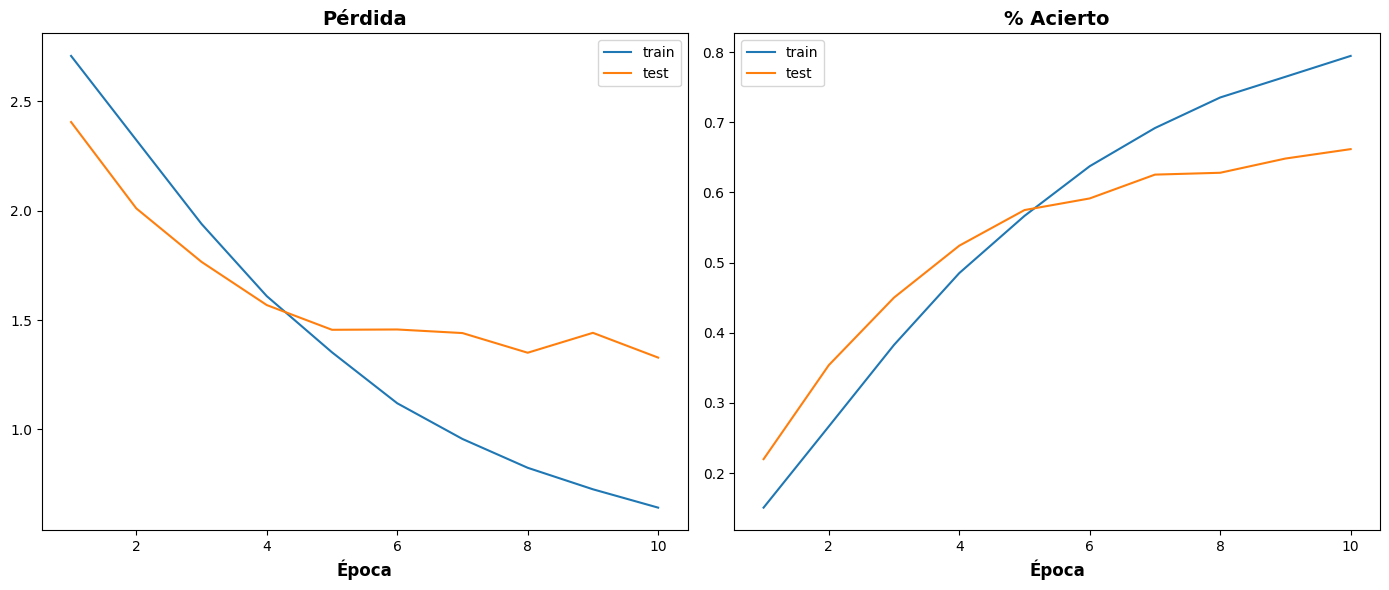

In [ ]:
graficar_historial_entrenamiento(hist_sin_aug)

El modelo muestra una mejora sostenida en su desempeño durante el entrenamiento, evidenciada por un aumento progresivo en la precisión y una reducción continua en la pérdida. A lo largo de las épocas, también se observa una mejora en el porcentaje de acierto sobre el conjunto de validación, aunque se tiende a estancar a partir de la epoca 7. La pérdida de validación, si bien tiende a disminuir inicialmente, tammbién comienza a estabilizarse en las últimas épocas, con ligeras fluctuaciones. Este comportamiento sugiere que el modelo está aprendiendo correctamente, pero empieza a presentar señales de sobreentrenamiento, donde su capacidad de generalización no mejora al mismo ritmo que su rendimiento sobre los datos de entrenamiento.

In [ ]:
df_metricas_red_sin_augmentation = crear_df_metricas(hist_sin_aug, "Primera_red_sin_aug")

,Métrica,Primera_red_sin_aug
0,accuracy,0.794642
1,loss,0.642785
2,precision,0.878539
3,recall,0.718884
4,val_accuracy,0.661753
5,val_loss,1.328415
6,val_precision,0.794034
7,val_recall,0.588576


El modelo muestra un desempeño más alto durante el entrenamiento que en la validación. Esto se observa en que las métricas como precision, recall y accuracy son más bajas cuando se prueba con datos nuevos. Esto indica que el modelo se ajusta bien a los datos que vio durante el entrenamiento, pero tiene dificultades para generalizar a otros casos. Una posible razón es que no se aplicó data augmentation, lo cual podría haber limitado la diversidad de ejemplos vistos durante el aprendizaje y reducido su capacidad para adaptarse a nuevas situaciones.

Debemos borrar los datos generados sin data aug, como no los usaremos más, colab se queda sin memoria y debemos aumentarla para seguir con los modelos con data aug.

In [ ]:
del X_train_noaug
del y_train_noaug
del X_val_noaug
del y_val_noaug
import gc
gc.collect()

17173

#Modelos con data AUG

##Modelo 1

El modelo 1 con data augmentation utiliza la misma arquitectura que el modelo base sin aumento de datos, conservando la capa convolucional seguida de pooling, las cinco capas densas, las capas Dropout y la capa de salida softmax. La diferencia principal es la aplicación de técnicas de data augmentation durante el entrenamiento, con el fin de aumentar artificialmente la variedad y cantidad de imágenes disponibles. Este enfoque busca mejorar la capacidad de generalización del modelo, reduciendo el riesgo de sobreajuste al exponerlo a versiones modificadas de las imágenes originales mediante transformaciones como rotaciones, desplazamientos, zooms y reflejos horizontales. Al mantener la arquitectura constante y variar únicamente la preparación del conjunto de datos, este modelo permite evaluar el impacto específico del data augmentation sobre el desempeño y robustez del modelo base.

In [ ]:
red_con_augmentation = keras.Sequential(name="Primera_red_con_aug")
red_con_augmentation.add(Input(shape=(64, 64, 3), name="entrada"))

red_con_augmentation.add(Conv2D(32, (3, 3), activation='relu', padding='same', name="convolucion_1"))
red_con_augmentation.add(MaxPooling2D((2, 2), name="pooling_1"))

red_con_augmentation.add(Flatten(name="flatten_1"))

red_con_augmentation.add(Dropout(0.3, name="dropout_1"))
red_con_augmentation.add(Dense(512, activation='relu', name="CapaOculta_1"))
red_con_augmentation.add(Dropout(0.3, name="dropout_2"))
red_con_augmentation.add(Dense(256, activation='relu', name="CapaOculta_2"))
red_con_augmentation.add(Dense(128, activation='relu', name="CapaOculta_3"))
red_con_augmentation.add(Dropout(0.3, name="dropout_3"))
red_con_augmentation.add(Dense(64, activation='relu', name="CapaOculta_4"))
red_con_augmentation.add(Dropout(0.3, name="dropout_4"))
red_con_augmentation.add(Dense(32, activation='relu', name="CapaOculta_5"))
red_con_augmentation.add(Dropout(0.35, name="dropout_5"))
red_con_augmentation.add(Dense(18, activation='softmax', name="salida"))
red_con_augmentation.summary()

Model: "Primera_red_con_aug"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ convolucion_1 (Conv2D)          │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_1 (MaxPooling2D)        │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CapaOculta_1 (Dense)            │ (None, 512)            │    16,777,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CapaOculta_2 (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CapaOculta_3 (Dense)            │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CapaOculta_4 (Dense)            │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CapaOculta_5 (Dense)            │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ salida (Dense)                  │ (None, 18)             │           594 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,953,778 (64.67 MB)

 Trainable params: 16,953,778 (64.67 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
np.random.seed(29)
tf.random.set_seed(29)

red_con_augmentation.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy', 'precision', 'recall']
)

hist_con_aug = red_con_augmentation.fit(
    X_train, y_train,
    batch_size=32,
    epochs=10,
    validation_data=(X_val,y_val)
)

Epoch 1/10
1019/1019 ━━━━━━━━━━━━━━━━━━━━ 23s 16ms/step - accuracy: 0.0899 - loss: 2.8930 - precision: 0.3896 - recall: 0.0074 - val_accuracy: 0.2437 - val_loss: 2.3880 - val_precision: 0.7075 - val_recall: 0.0592
Epoch 2/10
1019/1019 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.2644 - loss: 2.3521 - precision: 0.7256 - recall: 0.0972 - val_accuracy: 0.3825 - val_loss: 1.8666 - val_precision: 0.8462 - val_recall: 0.2014
Epoch 3/10
1019/1019 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.4046 - loss: 1.9090 - precision: 0.8246 - recall: 0.2273 - val_accuracy: 0.5280 - val_loss: 1.5722 - val_precision: 0.8618 - val_recall: 0.2840
Epoch 4/10
1019/1019 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.5098 - loss: 1.5947 - precision: 0.8475 - recall: 0.3273 - val_accuracy: 0.5678 - val_loss: 1.4471 - val_precision: 0.8546 - val_recall: 0.3759
Epoch 5/10
1019/1019 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.5820 - loss: 1.3398 - precision: 0.8480 - recall: 0.4169 - val_accuracy: 0.582

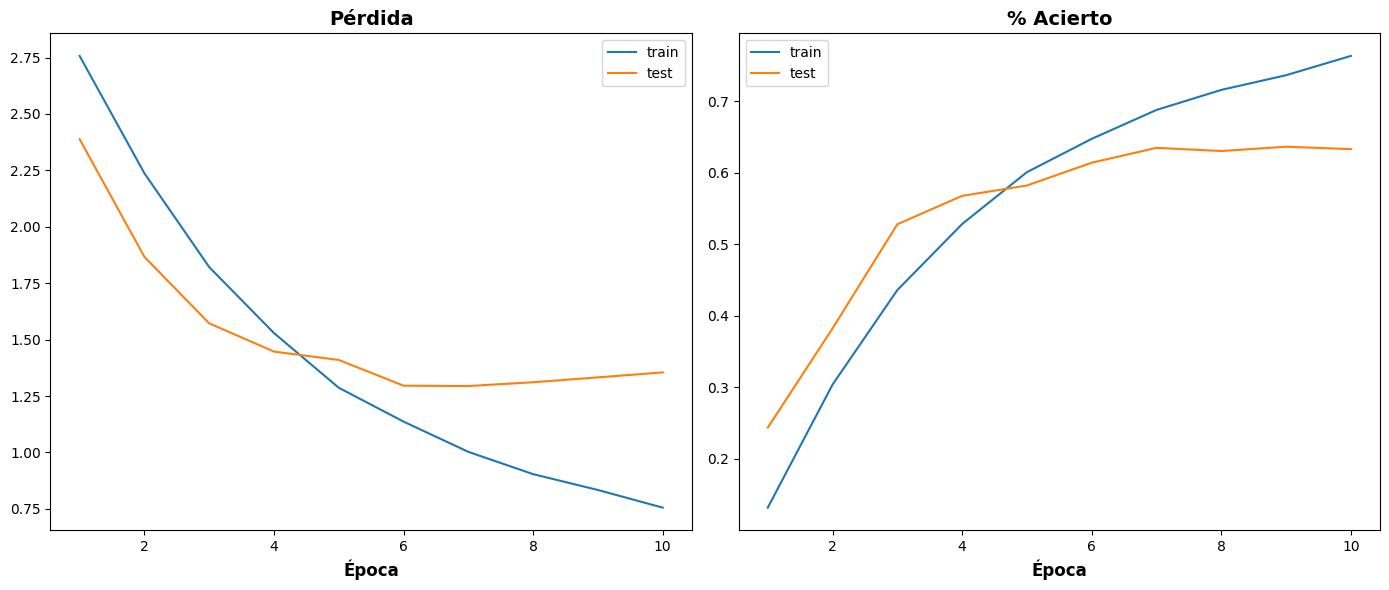

In [ ]:
graficar_historial_entrenamiento(hist_con_aug)

En este modelo, entrenado con data augmentation, se observa un rendimiento muy similar al obtenido sin aplicar dicha técnica, incluyendo un nivel comparable de sobreentrenamiento en las últimas épocas. Esto sugiere que, a pesar de la introducción de datos más diversos durante el entrenamiento, el impacto no fue suficiente para marcar una diferencia significativa en la generalización. Una posible explicación es que la arquitectura utilizada resulta demasiado básica o limitada como para captar y aprovechar de forma efectiva las ventajas del aumento de datos, lo que impide que se reflejen diferencias sustanciales entre ambos enfoques.



In [ ]:
df_metricas_red_con_augmentation = crear_df_metricas(hist_con_aug, "Primera_red_con_aug")

,Métrica,Primera_red_con_aug
0,accuracy,0.763382
1,loss,0.755530
2,precision,0.871589
3,recall,0.668539
4,val_accuracy,0.633061
5,val_loss,1.354754
6,val_precision,0.777818
7,val_recall,0.563043


En este modelo con data augmentation, se observa nuevamente una diferencia entre el rendimiento en entrenamiento y validación, lo que evidencia la presencia de sobreajuste, aunque en magnitud similar a la del modelo sin aumento de datos. Si bien el uso de data augmentation permitió incorporar mayor diversidad en los datos de entrada, las métricas finales no reflejan mejoras significativas. Por ejemplo, tanto la precisión como el recall y la accuracy en validación siguen siendo más bajas que durante el entrenamiento, lo que indica dificultades del modelo para generalizar correctamente. En comparación con el modelo sin data augmentation, las métricas de validación presentan solo leves diferencias, lo cual refuerza la idea de que la arquitectura utilizada podría tener una capacidad limitada para beneficiarse de técnicas de regularización como esta. En conjunto, los resultados sugieren que, si bien el modelo con data augmentation mantiene un desempeño relativamente estable, no logra una mejora clara respecto al modelo base.

## Modelo 2

Para la segunda red con data augmentation, se incorporó una capa convolucional adicional seguida de su respectivo max pooling al inicio de la arquitectura. Esta modificación permite una extracción de características más profunda y detallada antes de la etapa de aplanado (flatten), con el fin de mejorar la capacidad del modelo para generalizar, evitar el sobreajuste y captar patrones complejos en las imágenes. El resto de la estructura, incluyendo las capas densas y de dropout, se mantuvo igual respecto a la primera red con data augmentation.

In [ ]:
red_con_augmentation_2 = keras.Sequential(name="Segunda_red_con_aug")
red_con_augmentation_2.add(Input(shape=(64, 64, 3), name="entrada"))

red_con_augmentation_2.add(Conv2D(32, (3, 3), activation='relu', padding='same', name="convolucion_1"))
red_con_augmentation_2.add(MaxPooling2D((2, 2), name="pooling_1"))

red_con_augmentation_2.add(Conv2D(64, (3, 3), activation='relu', padding='same', name="convolucion_2"))
red_con_augmentation_2.add(MaxPooling2D((2, 2), name="pooling_2"))

red_con_augmentation_2.add(Flatten(name="flatten_1"))

red_con_augmentation_2.add(Dropout(0.3, name="dropout_1"))
red_con_augmentation_2.add(Dense(512, activation='relu', name="CapaOculta_1"))

red_con_augmentation_2.add(Dropout(0.3, name="dropout_2"))
red_con_augmentation_2.add(Dense(256, activation='relu', name="CapaOculta_2"))

red_con_augmentation_2.add(Dense(128, activation='relu', name="CapaOculta_3"))

red_con_augmentation_2.add(Dropout(0.3, name="dropout_3"))
red_con_augmentation_2.add(Dense(64, activation='relu', name="CapaOculta_4"))

red_con_augmentation_2.add(Dropout(0.3, name="dropout_4"))
red_con_augmentation_2.add(Dense(32, activation='relu', name="CapaOculta_5"))

red_con_augmentation_2.add(Dropout(0.35, name="dropout_5"))

red_con_augmentation_2.add(Dense(18, activation='softmax', name="salida"))

red_con_augmentation_2.summary()

Model: "Segunda_red_con_aug"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ convolucion_1 (Conv2D)          │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_1 (MaxPooling2D)        │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convolucion_2 (Conv2D)          │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_2 (MaxPooling2D)        │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CapaOculta_1 (Dense)            │ (None, 512)            │     8,389,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CapaOculta_2 (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CapaOculta_3 (Dense)            │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CapaOculta_4 (Dense)            │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CapaOculta_5 (Dense)            │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ salida (Dense)                  │ (None, 18)             │           594 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,583,666 (32.74 MB)

 Trainable params: 8,583,666 (32.74 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
np.random.seed(29)
tf.random.set_seed(29)

red_con_augmentation_2.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy', 'precision', 'recall']
)

hist_con_aug_2 = red_con_augmentation_2.fit(
    X_train, y_train,
    batch_size=32,
    epochs=10,
    validation_data=(X_val,y_val)
)

Epoch 1/10
1019/1019 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.0875 - loss: 2.8151 - precision: 0.4723 - recall: 0.0110 - val_accuracy: 0.2295 - val_loss: 2.3561 - val_precision: 0.7915 - val_recall: 0.0540
Epoch 2/10
1019/1019 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.2625 - loss: 2.2664 - precision: 0.6649 - recall: 0.0957 - val_accuracy: 0.4430 - val_loss: 1.7227 - val_precision: 0.9038 - val_recall: 0.2301
Epoch 3/10
1019/1019 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.4297 - loss: 1.8191 - precision: 0.8253 - recall: 0.2505 - val_accuracy: 0.5167 - val_loss: 1.4873 - val_precision: 0.8844 - val_recall: 0.2961
Epoch 4/10
1019/1019 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.5198 - loss: 1.5043 - precision: 0.8588 - recall: 0.3394 - val_accuracy: 0.5659 - val_loss: 1.3301 - val_precision: 0.8713 - val_recall: 0.3440
Epoch 5/10
1019/1019 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.5730 - loss: 1.3126 - precision: 0.8618 - recall: 0.3940 - val_accuracy: 0.6049 

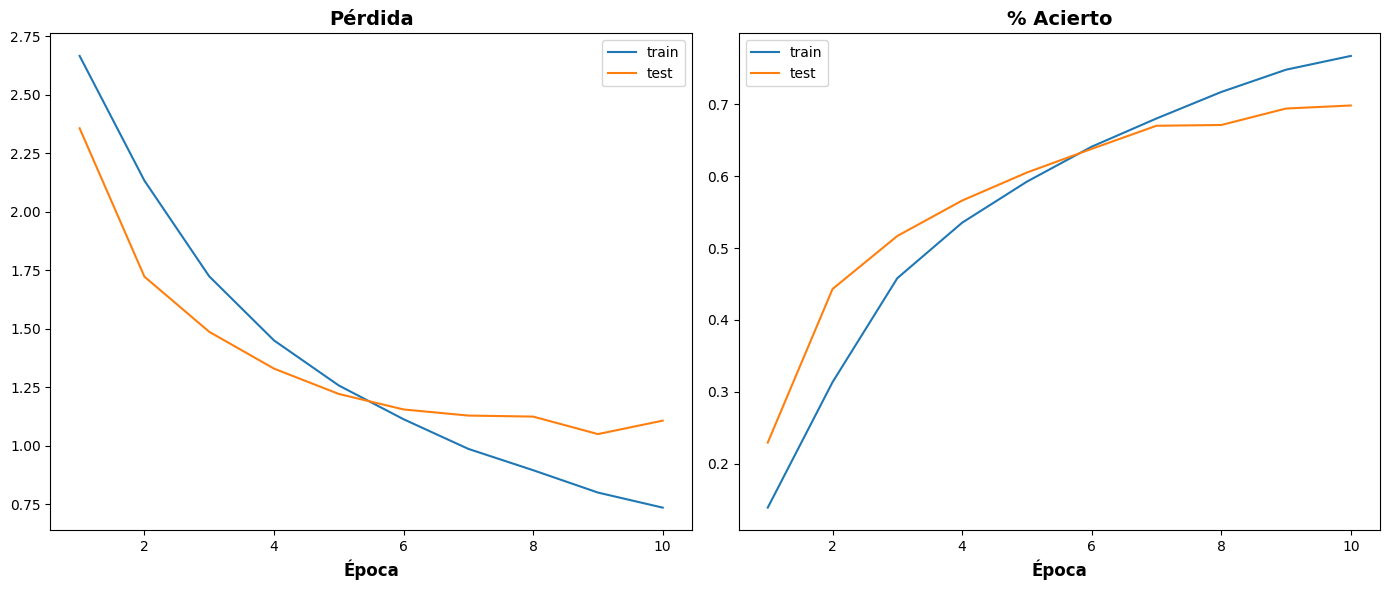

In [ ]:
graficar_historial_entrenamiento(hist_con_aug_2)

En este segundo modelo con data augmentation, se observa una mejora más progresiva y consistente en el rendimiento a lo largo de las épocas, tanto en las curvas de accuracy como de loss. La precisión de entrenamiento aumenta gradualmente mientras que la de validación también muestra una tendencia positiva. A diferencia del modelo anterior, donde el sobreentrenamiento era evidente desde etapas más tempranas, en este caso las curvas de entrenamiento y validación se mantienen más cercanas entre sí hasta las últimas épocas, indicando una mejor capacidad de generalización. Sin embargo, aún se puede observar una brecha entre ambas curvas, lo que sugiere que el modelo sigue siendo propenso al sobreajuste, aunque en menor medida que el anterior. Esta evolución más controlada del aprendizaje sugiere que el uso de data augmentation, más arqutiectura un poco más compleja, en este caso fue más efectivo, permitiendo una mejor adaptación del modelo a la variabilidad de los datos sin perder precisión en los ejemplos nuevos.

In [ ]:
df_metricas_red_sin_augmentation_2 = crear_df_metricas(hist_con_aug_2, "Segunda_red_con_aug")

,Métrica,Segunda_red_con_aug
0,accuracy,0.766974
1,loss,0.736505
2,precision,0.895927
3,recall,0.658993
4,val_accuracy,0.698078
5,val_loss,1.107918
6,val_precision,0.837242
7,val_recall,0.620163


En este segundo modelo con data augmentation, se aprecia una mejora general en el equilibrio entre el rendimiento en entrenamiento y validación, especialmente si lo comparamos con el modelo anterior. La diferencia entre las métricas en ambos conjuntos se reduce, lo que sugiere un menor grado de sobreajuste y una mejor capacidad del modelo para generalizar. Aunque sigue existiendo una brecha entre los resultados en entrenamiento y validación, esta es menos pronunciada que en el modelo 1, lo que representa un avance. La mayor precisión y recall en validación apuntan a una mejora en la detección de las clases, lo cual es un indicador de un mejor aprendizaje. Esta mejora en el balance podría estar relacionada con la modificación en la arquitectura respecto al modelo 1, donde se agregó una segunda capa convolucional y un segundo MaxPooling, permitiendo extraer características más complejas sin perder estabilidad. En este sentido, si bien aún no se alcanza un modelo generalizable, la evolución observada sugiere que la combinación de una arquitectura más profunda con data augmentation comienza a tener un impacto positivo en el desempeño general del sistema.

##Modelo 3

La tercera red con data augmentation amplía la arquitectura añadiendo una tercera capa convolucional con su respectivo max pooling, lo que permite captar patrones más complejos en las imágenes. Para equilibrar esta mayor profundidad, se redujo el número de capas densas a dos, buscando evitar el sobreajuste que evidenciamos en el modelo anterior y mantener un buen rendimiento. Las tasas de dropout se incrementaron ligeramente, fortaleciendo la regularización del modelo. Por otra parte, el tamaño de entrada y otros hiperparámetros fundamentales se conservaron igual que en las redes anteriores para asegurar una comparación coherente entre los modelos.

In [ ]:
red_con_augmentation_3 = keras.Sequential(name="Tercera_red_con_aug")
red_con_augmentation_3.add(Input(shape=(64, 64, 3), name="entrada"))

red_con_augmentation_3.add(Conv2D(32, (3, 3), activation='relu', padding='same', name="convolucion_1"))
red_con_augmentation_3.add(MaxPooling2D((2, 2), name="pooling_1"))

red_con_augmentation_3.add(Conv2D(64, (3, 3), activation='relu', padding='same', name="convolucion_2"))
red_con_augmentation_3.add(MaxPooling2D((2, 2), name="pooling_2"))

red_con_augmentation_3.add(Conv2D(128, (3, 3), activation='relu', padding='same', name="convolucion_3"))
red_con_augmentation_3.add(MaxPooling2D((2, 2), name="pooling_3"))

red_con_augmentation_3.add(Flatten(name="flatten_1"))

red_con_augmentation_3.add(Dropout(0.4, name="dropout_1"))
red_con_augmentation_3.add(Dense(256, activation='relu', name="CapaOculta_1"))
red_con_augmentation_3.add(Dropout(0.4, name="dropout_2"))
red_con_augmentation_3.add(Dense(128, activation='relu', name="CapaOculta_2"))
red_con_augmentation_3.add(Dropout(0.3, name="dropout_3"))
red_con_augmentation_3.add(Dense(18, activation='softmax', name="salida"))

red_con_augmentation_3.summary()

Model: "Tercera_red_con_aug"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ convolucion_1 (Conv2D)          │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_1 (MaxPooling2D)        │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convolucion_2 (Conv2D)          │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_2 (MaxPooling2D)        │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convolucion_3 (Conv2D)          │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_3 (MaxPooling2D)        │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CapaOculta_1 (Dense)            │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CapaOculta_2 (Dense)            │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ salida (Dense)                  │ (None, 18)             │         2,322 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,225,874 (8.49 MB)

 Trainable params: 2,225,874 (8.49 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
np.random.seed(29)
tf.random.set_seed(29)

red_con_augmentation_3.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy', 'precision', 'recall']
)

hist_con_aug_3 = red_con_augmentation_3.fit(
    X_train, y_train,
    batch_size=32,
    epochs=10,
    validation_data=(X_val,y_val)
)

Epoch 1/10
1019/1019 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.2464 - loss: 2.4116 - precision: 0.6785 - recall: 0.0875 - val_accuracy: 0.6533 - val_loss: 1.1058 - val_precision: 0.8604 - val_recall: 0.4883
Epoch 2/10
1019/1019 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.6407 - loss: 1.1934 - precision: 0.8431 - recall: 0.4999 - val_accuracy: 0.7802 - val_loss: 0.7415 - val_precision: 0.8858 - val_recall: 0.6920
Epoch 3/10
1019/1019 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7573 - loss: 0.8147 - precision: 0.8802 - recall: 0.6639 - val_accuracy: 0.8094 - val_loss: 0.6437 - val_precision: 0.8800 - val_recall: 0.7513
Epoch 4/10
1019/1019 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8053 - loss: 0.6351 - precision: 0.8993 - recall: 0.7387 - val_accuracy: 0.8252 - val_loss: 0.6016 - val_precision: 0.8882 - val_recall: 0.7799
Epoch 5/10
1019/1019 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8430 - loss: 0.5117 - precision: 0.9112 - recall: 0.7925 - val_accuracy: 0.8597 

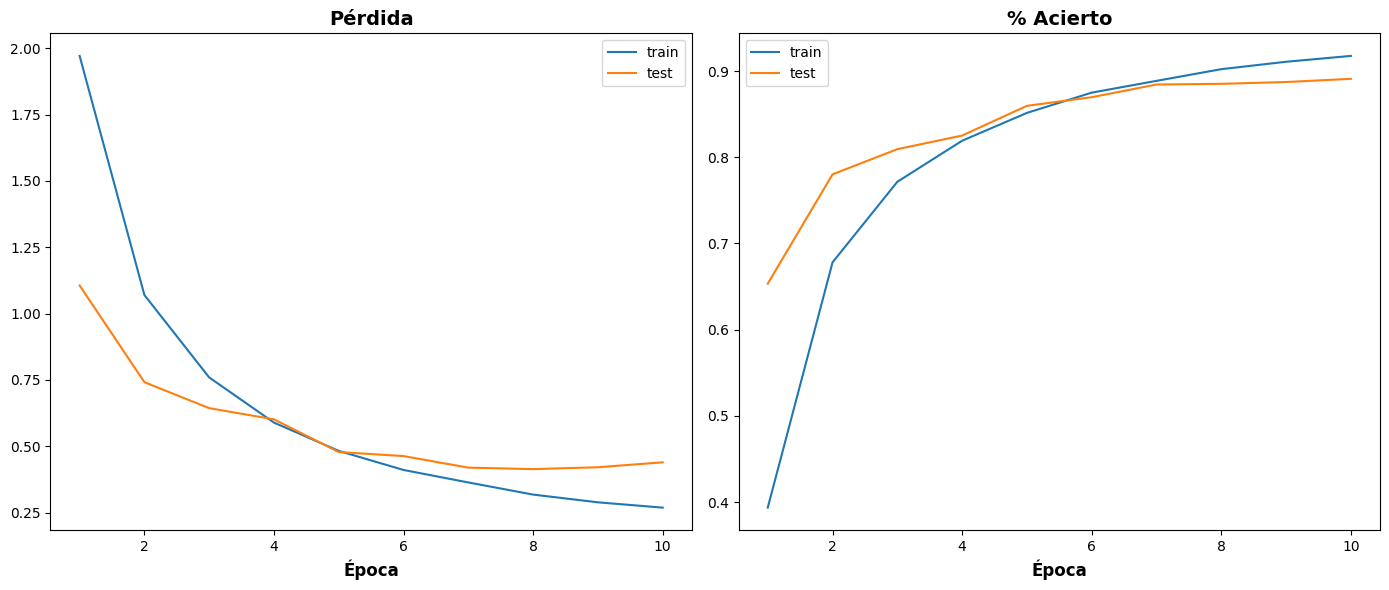

In [ ]:
graficar_historial_entrenamiento(hist_con_aug_3)

El tercer modelo muestra un avance mucho más acelerado y sostenido durante el entrenamiento en comparación con los modelos anteriores. Tanto la accuracy como la pérdida mejoran de forma constante y significativa en ambas fases, entrenamiento y validación. La pérdida se reduce notablemente con cada época, reflejando un aprendizaje más efectivo. Además, las métricas de validación superan claramente a las de los modelos previos, con valores de acierto por encima del 90% al finalizar el entrenamiento. No obstante, se percibe un pequeño sobreajuste, ya que el desempeño en validación es ligeramente inferior al obtenido en entrenamiento, y la pérdida en validación es un poco mayor. A pesar de esta leve diferencia, el modelo mantiene un equilibrio sólido entre aprendizaje y generalización, minimizando el riesgo de sobreajuste. En conjunto, este desempeño representa un avance significativo y posiciona al modelo 3 como la mejor arquitectura evaluada hasta ahora

In [ ]:
df_metricas_red_sin_augmentation_3 = crear_df_metricas(hist_con_aug_3, "Tercera_red_con_aug")

,Métrica,Tercera_red_con_aug
0,accuracy,0.917618
1,loss,0.268901
2,precision,0.946031
3,recall,0.895826
4,val_accuracy,0.891024
5,val_loss,0.439623
6,val_precision,0.925063
7,val_recall,0.867597


El tercer modelo con data augmentation muestra una mejora notable y sostenida en todas las métricas generales, tanto en entrenamiento como en validación, en comparación con el modelo 2. La accuracy y precision alcanzan valores más altos, evidenciando que el modelo clasifica correctamente la mayoría de los casos y con mayor exactitud. Además, el recall también presenta un aumento significativo y equilibrado entre ambas fases, lo que indica una mejor capacidad para identificar correctamente las clases. Esta mejora puede estar relacionada con la incorporación de una tercera capa convolucional y un tercer pooling, que permiten extraer patrones más complejos, junto con un uso más optimizado de capas densas y dropout para mejorar la generalización. Sin embargo, se observa un ligero sobreajuste, reflejado en una accuracy de entrenamiento que supera al valor en validación, así como una pérdida menor durante el entrenamiento en comparación con la validación. A pesar de esta leve diferencia, el modelo mantiene un equilibrio sólido entre aprendizaje y generalización. En conjunto, los resultados posicionan al modelo 3 como la mejor arquitectura hasta ahora entre las evaluadas, con un desempeño más consistente en todos los indicadores.

##Modelo 4

La cuarta arquitectura mantiene la estructura de tres bloques convolucionales con sus correspondientes capas de pooling, igual que la tercera red, pero se diferencia por la incorporación de capas de batch normalization después de cada convolución y también entre las capas densas ocultas. Esta adición busca aumentar los valores de accuracy y reducir la pérdida (loss). Esto se fundamenta en el buen rendimiento en cuanto a sobreajuste que mostró el modelo anterior, por lo que se pretende optimizar aún más el desempeño sin aumentar significativamente la complejidad, manteniendo un diseño equilibrado entre profundidad y regularización.

In [ ]:
red_con_augmentation_4 = keras.Sequential(name="Cuarta_red_con_aug")
red_con_augmentation_4.add(Input(shape=(64, 64, 3), name="entrada"))

red_con_augmentation_4.add(Conv2D(32, (3, 3), activation='relu', padding='same', name="convolucion_1"))
red_con_augmentation_4.add(BatchNormalization(name="batchNormalization_1"))
red_con_augmentation_4.add(MaxPooling2D((2, 2), name="pooling_1"))

red_con_augmentation_4.add(Conv2D(64, (3, 3), activation='relu', padding='same', name="convolucion_2"))
red_con_augmentation_4.add(BatchNormalization(name="batchNormalization_2"))
red_con_augmentation_4.add(MaxPooling2D((2, 2), name="pooling_2"))

red_con_augmentation_4.add(Conv2D(128, (3, 3), activation='relu', padding='same', name="convolucion_3"))
red_con_augmentation_4.add(BatchNormalization(name="batchNormalization_3"))
red_con_augmentation_4.add(MaxPooling2D((2, 2), name="pooling_3"))

red_con_augmentation_4.add(Flatten(name="Flatten"))

red_con_augmentation_4.add(Dropout(0.4, name="dropout_1"))
red_con_augmentation_4.add(Dense(256, activation='relu', name="CapaOculta_1"))
red_con_augmentation_4.add(BatchNormalization(name="batchNormalization_4"))

red_con_augmentation_4.add(Dropout(0.4, name="dropout_2"))
red_con_augmentation_4.add(Dense(128, activation='relu', name="CapaOculta_2"))
red_con_augmentation_4.add(BatchNormalization(name="batchNormalization_5"))

red_con_augmentation_4.add(Dropout(0.3, name="dropout_3"))
red_con_augmentation_4.add(Dense(18, activation='softmax', name="salida"))

red_con_augmentation_4.summary()

Model: "Cuarta_red_con_aug"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ convolucion_1 (Conv2D)          │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchNormalization_1            │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_1 (MaxPooling2D)        │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convolucion_2 (Conv2D)          │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchNormalization_2            │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_2 (MaxPooling2D)        │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convolucion_3 (Conv2D)          │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchNormalization_3            │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_3 (MaxPooling2D)        │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CapaOculta_1 (Dense)            │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchNormalization_4            │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CapaOculta_2 (Dense)            │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchNormalization_5            │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ salida (Dense)                  │ (None, 18)             │         2,322 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,228,306 (8.50 MB)

 Trainable params: 2,227,090 (8.50 MB)

 Non-trainable params: 1,216 (4.75 KB)

In [ ]:
np.random.seed(29)
tf.random.set_seed(29)

red_con_augmentation_4.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy', 'precision', 'recall']
)

hist_con_aug_4 = red_con_augmentation_4.fit(
    X_train, y_train,
    batch_size=32,
    epochs=10,
    validation_data=(X_val,y_val)
)

Epoch 1/10
1019/1019 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.3395 - loss: 2.3414 - precision: 0.5553 - recall: 0.1895 - val_accuracy: 0.5275 - val_loss: 1.5237 - val_precision: 0.6913 - val_recall: 0.4280
Epoch 2/10
1019/1019 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.6740 - loss: 1.0915 - precision: 0.8300 - recall: 0.5533 - val_accuracy: 0.7099 - val_loss: 0.9780 - val_precision: 0.7805 - val_recall: 0.6562
Epoch 3/10
1019/1019 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.7864 - loss: 0.7019 - precision: 0.8763 - recall: 0.7166 - val_accuracy: 0.8176 - val_loss: 0.6037 - val_precision: 0.8772 - val_recall: 0.7826
Epoch 4/10
1019/1019 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8424 - loss: 0.5196 - precision: 0.9022 - recall: 0.7974 - val_accuracy: 0.8779 - val_loss: 0.4088 - val_precision: 0.9165 - val_recall: 0.8521
Epoch 5/10
1019/1019 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8791 - loss: 0.3896 - precision: 0.9204 - recall: 0.8489 - val_accuracy: 0.8565 -

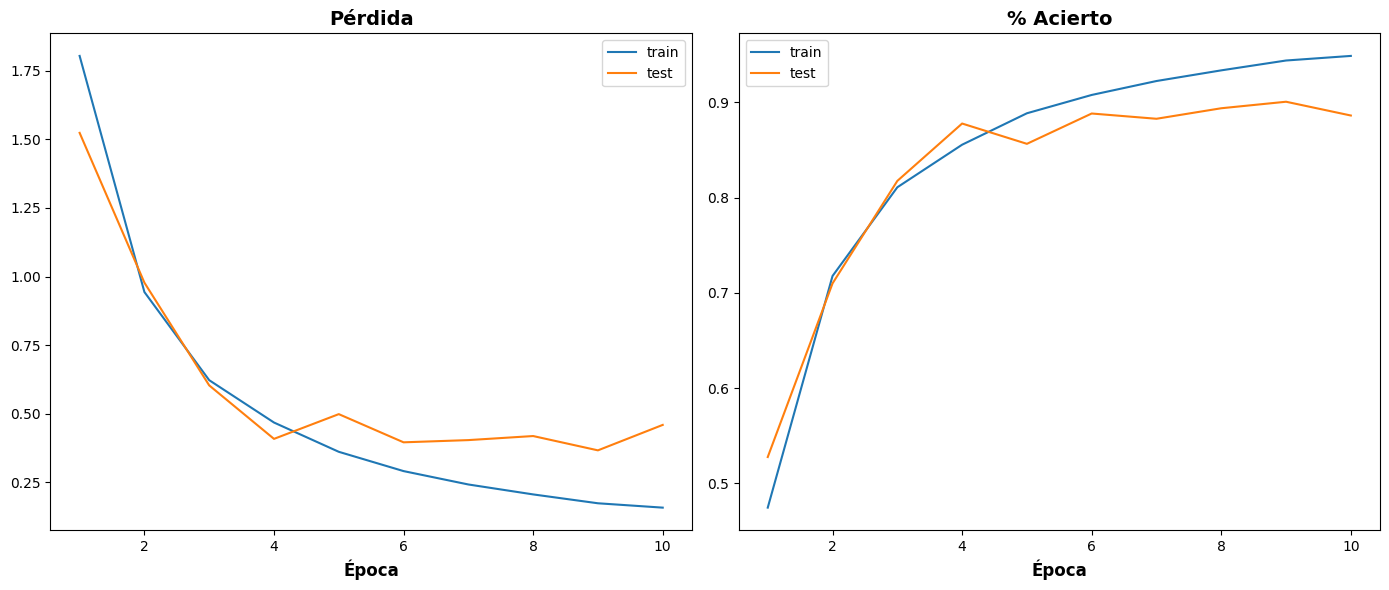

In [ ]:
graficar_historial_entrenamiento(hist_con_aug_4)

El cuarto modelo logra superar el rendimiento del modelo 3 en términos de pérdida y porcentaje de acierto, alcanzando un nivel de pérdida aún más bajo al final del entrenamiento y mayor valor en accuracy. Sin embargo, al analizar las curvas, se comienza a a evidenciar signos de sobreajuste. Aunque la pérdida en entrenamiento disminuye de forma pronunciada, en validación tiende a estancarse e incluso fluctuar, lo que indica que el modelo comienza a memorizar más que generalizar. Del mismo modo, aunque la accuracy de entrenamiento continúa mejorando sostenidamente, la curva de validación muestra una tendencia a estabilizarse con una brecha respecto al entrenamiento.
Si bien este modelo presenta el mejor desempeño en términos de acierto, los gráficos sugieren que esa ganancia viene acompañada de un menor control sobre la generalización, lo que podría comprometer su rendimiento frente a datos nuevos.

In [ ]:
df_metricas_red_sin_augmentation_4 = crear_df_metricas(hist_con_aug_4, "Cuarta_red_con_aug")

,Métrica,Cuarta_red_con_aug
0,accuracy,0.948895
1,loss,0.158322
2,precision,0.960157
3,recall,0.940117
4,val_accuracy,0.886286
5,val_loss,0.459752
6,val_precision,0.900135
7,val_recall,0.875494


El cuarto modelo presenta una arquitectura más compleja, incorporando capas de batch normalization después de cada convolución y capas densas, lo que contribuye a un entrenamiento más eficiente y estable. Esta mejora de la arquitectura se refleja en un aumento en las métricas durante la fase de entrenamiento, con un mayor acierto y precisión respecto al modelo anterior y disminuición de la pérdida. Sin embargo, a pesar de este progreso, las métricas en la fase de validación no alcanzan a converger con las de entrenamiento y muestran una diferencia. Esto indica que, aunque el modelo aprende con mayor profundidad los patrones del conjunto de entrenamiento, tiene dificultades para generalizar, manifestando señales de sobreajuste. En comparación con el modelo tres, que mostró un equilibrio más adecuado entre entrenamiento y validación, este modelo requiere un ajuste más cuidadoso para mejorar su capacidad de generalización y evitar la pérdida de rendimiento fuera del entrenamiento. Por lo tanto, aunque la arquitectura avanzada mejora el aprendizaje en entrenamiento, el impacto del sobreajuste limita su desempeño real en escenarios nuevos.

##Modelo 5

La quinta arquitectura amplía la estructura anterior agregando un cuarto bloque convolucional con su respectiva capa de batch normalization y pooling, aumentando así la capacidad de extracción de características. Se mantiene la inclusión del batch normalization y capas densas con dropout para favorecer la regularización. Los hiperparámetros se conservaron igual que en el modelo previo. Esta vez, el objetivo principal es seguir intentando reducir el  sobreajuste observado en el modelo anterior, buscando un mejor balance entre ajuste y generalización, al tiempo que se mejora la precisión y se controla la pérdida durante el entrenamiento.

In [ ]:
red_con_augmentation_5 = keras.Sequential(name="Quinta_red_con_aug")
red_con_augmentation_5.add(Input(shape=(64, 64, 3), name="entrada"))

red_con_augmentation_5.add(Conv2D(32, (3, 3), activation='relu', padding='same', name="convolucion_1"))
red_con_augmentation_5.add(BatchNormalization(name="batchNormalization_1"))
red_con_augmentation_5.add(MaxPooling2D((2, 2), name="pooling_1"))

red_con_augmentation_5.add(Conv2D(64, (3, 3), activation='relu', padding='same', name="convolucion_2"))
red_con_augmentation_5.add(BatchNormalization(name="batchNormalization_2"))
red_con_augmentation_5.add(MaxPooling2D((2, 2), name="pooling_2"))

red_con_augmentation_5.add(Conv2D(128, (3, 3), activation='relu', padding='same', name="convolucion_3"))
red_con_augmentation_5.add(BatchNormalization(name="batchNormalization_3"))
red_con_augmentation_5.add(MaxPooling2D((2, 2), name="pooling_3"))

red_con_augmentation_5.add(Conv2D(128, (3, 3), activation='relu', padding='same', name="convolucion_4"))
red_con_augmentation_5.add(BatchNormalization(name="batchNormalization_4"))
red_con_augmentation_5.add(MaxPooling2D((2, 2), name="pooling_4"))

red_con_augmentation_5.add(Flatten(name="Flatten"))

red_con_augmentation_5.add(Dropout(0.4, name="dropout_1"))
red_con_augmentation_5.add(Dense(256, activation='relu', name="CapaOculta_1"))
red_con_augmentation_5.add(BatchNormalization(name="batchNormalization_5"))

red_con_augmentation_5.add(Dropout(0.4, name="dropout_2"))
red_con_augmentation_5.add(Dense(128, activation='relu', name="CapaOculta_2"))
red_con_augmentation_5.add(BatchNormalization(name="batchNormalization_6"))

red_con_augmentation_5.add(Dropout(0.3, name="dropout_3"))
red_con_augmentation_5.add(Dense(18, activation='softmax', name="salida"))

red_con_augmentation_5.summary()

Model: "Quinta_red_con_aug"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ convolucion_1 (Conv2D)          │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchNormalization_1            │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_1 (MaxPooling2D)        │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convolucion_2 (Conv2D)          │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchNormalization_2            │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_2 (MaxPooling2D)        │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convolucion_3 (Conv2D)          │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchNormalization_3            │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_3 (MaxPooling2D)        │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convolucion_4 (Conv2D)          │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchNormalization_4            │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_4 (MaxPooling2D)        │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CapaOculta_1 (Dense)            │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchNormalization_5            │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CapaOculta_2 (Dense)            │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchNormalization_6            │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ salida (Dense)                  │ (None, 18)             │         2,322 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 803,538 (3.07 MB)

 Trainable params: 802,066 (3.06 MB)

 Non-trainable params: 1,472 (5.75 KB)

In [ ]:
np.random.seed(29)
tf.random.set_seed(29)

red_con_augmentation_5.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy', 'precision', 'recall']
)

hist_con_aug_5 = red_con_augmentation_5.fit(
    X_train, y_train,
    batch_size=32,
    epochs=10,
    validation_data=(X_val,y_val)
)

Epoch 1/10
1019/1019 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.3228 - loss: 2.3767 - precision: 0.5373 - recall: 0.1764 - val_accuracy: 0.6457 - val_loss: 1.1280 - val_precision: 0.8124 - val_recall: 0.5017
Epoch 2/10
1019/1019 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.6918 - loss: 1.0179 - precision: 0.8348 - recall: 0.5833 - val_accuracy: 0.8171 - val_loss: 0.5789 - val_precision: 0.8993 - val_recall: 0.7644
Epoch 3/10
1019/1019 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8143 - loss: 0.6265 - precision: 0.8876 - recall: 0.7541 - val_accuracy: 0.8147 - val_loss: 0.6523 - val_precision: 0.8721 - val_recall: 0.7789
Epoch 4/10
1019/1019 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8628 - loss: 0.4582 - precision: 0.9154 - recall: 0.8233 - val_accuracy: 0.8584 - val_loss: 0.4731 - val_precision: 0.9088 - val_recall: 0.8286
Epoch 5/10
1019/1019 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8916 - loss: 0.3585 - precision: 0.9302 - recall: 0.8652 - val_accuracy: 0.8765 -

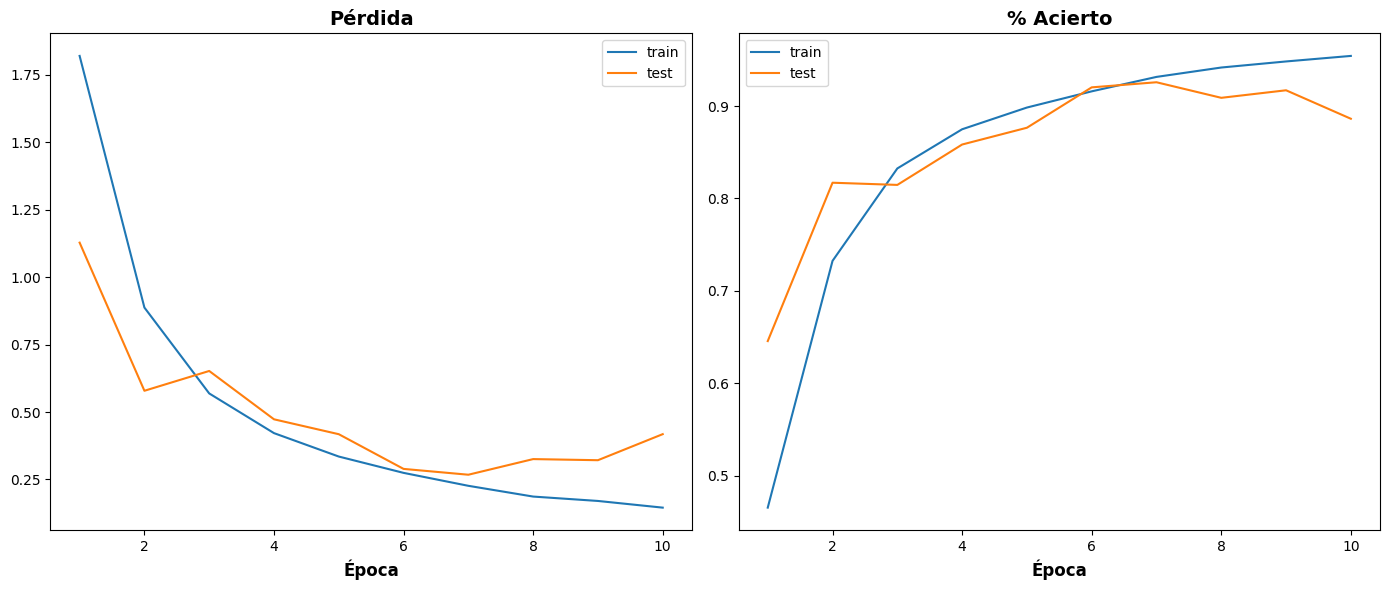

In [ ]:
graficar_historial_entrenamiento(hist_con_aug_5)

El quinto modelo muestra una mejora progresiva durante el entrenamiento, con curvas de pérdida y exactitud que reflejan un aprendizaje efectivo. La época 7 destaca como el punto de mejor equilibrio entre entrenamiento y validación, sin señales de sobreajuste, lo que sugiere que ahí el modelo generalizaba de forma óptima. Sin embargo, en las épocas siguientes se observa una leve separación entre las curvas, señal de que el modelo comienza a sobreentrenarse. Al no contar con early stopping, el entrenamiento continuó, perdiendo parte del beneficio alcanzado en la época 7, evidenciando el sobreajuste.

In [ ]:
df_metricas_red_sin_augmentation_5 = crear_df_metricas(hist_con_aug_5, "Quinta_red_con_aug")

,Métrica,Quinta_red_con_aug
0,accuracy,0.954266
1,loss,0.145633
2,precision,0.964779
3,recall,0.945856
4,val_accuracy,0.886286
5,val_loss,0.418056
6,val_precision,0.902664
7,val_recall,0.873914


El quinto modelo presenta una arquitectura más profunda que incorpora una capa convolucional adicional junto con su correspondiente normalización y reducción de dimensión, lo que intensifica la capacidad del modelo para extraer características complejas. Esta ampliación en la arquitectura contribuye a mejorar las métricas durante el entrenamiento, con incrementos visibles en accuracy, precision y recall.

Sin embargo, al comparar con los resultados de validación, se observa una brecha aún más pronunciada entre las métricas de entrenamiento y validación con respecto al modelo anterior. Aunque las métricas de validación también son relativamente altas, no logran alcanzar el nivel del entrenamiento, y la pérdida (loss) en validación es claramente mayor, lo que indica que el modelo empieza a memorizar patrones específicos del conjunto de entrenamiento en lugar de generalizar.

En comparación con el modelo cuatro, que ya mostraba señales de sobreajuste, el modelo cinco intensifica esta situación debido a su mayor complejidad. Esta tendencia se ve reforzada por la ausencia de un mecanismo de early stopping, lo que permitió que el entrenamiento continuara incluso después de haber alcanzado el punto de mejor desempeño general (época 7), favoreciendo la sobreadaptación a los datos de entrenamiento. Esto sugiere que, aunque la arquitectura avanzada mejora la capacidad de aprendizaje en los datos conocidos, requiere estrategias adicionales de regularización o ajustes como early stopping para evitar la pérdida de generalización. Por lo tanto, a pesar del progreso en las métricas, el modelo 5 logra un aprendizaje más profundo, pero a costa de aumentar el riesgo de sobreajuste, lo que puede comprometer su desempeño con datos nuevos.

#Comparacion de modelos con data aug

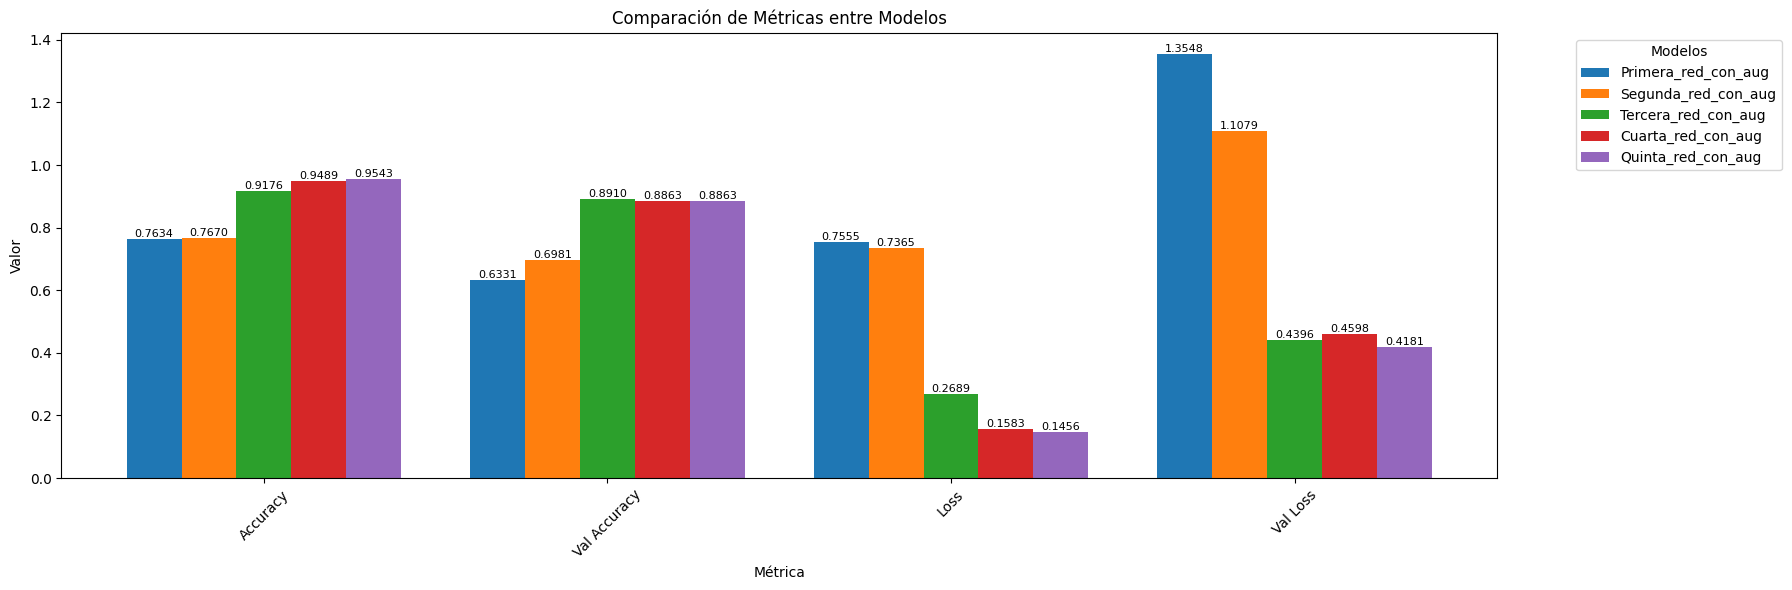

In [ ]:
historiales_2 = [
    hist_con_aug.history,
    hist_con_aug_2.history,
    hist_con_aug_3.history,
    hist_con_aug_4.history,
    hist_con_aug_5.history
]

nombres_modelos_2 = [
    'Primera_red_con_aug',
    'Segunda_red_con_aug',
    'Tercera_red_con_aug',
    'Cuarta_red_con_aug',
    'Quinta_red_con_aug'
]

df_resultado_2 = graficar_comparacion_modelos(historiales_2, nombres_modelos_2)

Al observar el gráfico comparativo y resumen de métricas de los modelos entrenados con data augmentation, se aprecia inicialmente un desempeño limitado en el primer modelo, que refleja dificultades para generalizar correctamente debido a una menor capacidad para adaptarse a la variabilidad de los datos, debido a su arquitectura más básica.

Con el segundo modelo se observa un avance en el equilibrio entre el accuracy de entrenamiento y validación. Las modificaciones arquitectónicas introducidas parecen favorecer una mejor adaptación a la diversidad de los datos, disminuyendo en parte el desajuste y aportando mayor estabilidad al comportamiento del modelo. No obstante, persiste una brecha considerable entre ambos conjuntos, lo que indica que aún hay espacio para mejorar la capacidad de generalización.

El tercer modelo representa un muy buen progreso al exhibir un rendimiento más confiable tanto en el entrenamiento como en la validación. Este comportamiento sugiere que las mejoras en la arquitectura, junto con la incorporación de data augmentation, han logrado potenciar la capacidad del modelo para capturar patrones relevantes sin comprometer del todo la generalización. Aun así, se mantienen señales leves de sobreentrenamiento que podrían ser abordadas.

A partir del cuarto modelo, aunque se observa una mejora en las métricas en el conjunto de entrenamiento, el rendimiento en validación se estabiliza o incluso muestra ligeros retrocesos con respecto al modelo anterior, lo que indica que la complejidad añadida comienza a generar un leve sobreajuste.

Finalmente, el quinto modelo continúa mostrando una mejora en las métricas durante el entrenamiento, pero esta no se traduce en un avance significativo en el desempeño con datos nuevos, lo que indica que aumentar la complejidad de la red no contribuye a mejorar la capacidad de generalización.

Para concluir, la incorporación de data augmentation permitió un salto importante en la calidad del aprendizaje, especialmente en los primeros avances del modelo, y aunque la complejidad adicional mejora las métricas de entrenamiento, hay un punto donde la generalización se mantiene estable sin mejorar más.

In [ ]:
modelos_data_con_aug = [
    {
        'Nombre': 'Primera red con aug','Capas Convolucionales': '1 (32, 3×3)','Capas MaxPooling': '1 (2×2)','Batch Normalization': 'No','Capas Ocultas': '5 (512, 256, 128, 64, 32)','Dropout': '5 (4×0.3, 1×0.35)',
        **metricas(hist_con_aug)
    },
    {
        'Nombre': 'Segunda red con aug','Capas Convolucionales': '2 (32, 64, 3×3)','Capas MaxPooling': '2 (2×2)','Batch Normalization': 'No','Capas Ocultas': '5 (512, 256, 128, 64, 32)','Dropout': '5 (4×0.3, 1×0.35)',
        **metricas(hist_con_aug_2)
    },
    {
        'Nombre': 'Tercera red con aug','Capas Convolucionales': '3 (32, 64, 128, 3×3)','Capas MaxPooling': '3 (2×2)','Batch Normalization': 'No','Capas Ocultas': '2 (256, 128)','Dropout': '3 (2×0.4, 1×0.3)',
        **metricas(hist_con_aug_3)
    },
    {
        'Nombre': 'Cuarta red con aug','Capas Convolucionales': '3 (32, 64, 128, 3×3)','Capas MaxPooling': '3 (2×2)','Batch Normalization': '5 capas','Capas Ocultas': '2 (256, 128)','Dropout': '3 (2×0.4, 1×0.3)',
        **metricas(hist_con_aug_4)
    },
    {
        'Nombre': 'Quinta red con aug','Capas Convolucionales': '4 (32, 64, 128, 128, 3×3)','Capas MaxPooling': '4 (2×2)','Batch Normalization': '6 capas','Capas Ocultas': '2 (256, 128)','Dropout': '3 (2×0.4, 1×0.3)',
        **metricas(hist_con_aug_5)
    }
]

modelos_con_aug = pd.DataFrame(modelos_data_con_aug)

modelos_con_aug

,Nombre,Capas Convolucionales,Capas MaxPooling,Batch Normalization,Capas Ocultas,Dropout,Train Accuracy,Validation Accuracy,Train Loss,Validation Loss
0,Primera red con aug,"1 (32, 3×3)",1 (2×2),No,"5 (512, 256, 128, 64, 32)","5 (4×0.3, 1×0.35)",0.7634,0.6331,0.7555,1.3548
1,Segunda red con aug,"2 (32, 64, 3×3)",2 (2×2),No,"5 (512, 256, 128, 64, 32)","5 (4×0.3, 1×0.35)",0.7670,0.6981,0.7365,1.1079
2,Tercera red con aug,"3 (32, 64, 128, 3×3)",3 (2×2),No,"2 (256, 128)","3 (2×0.4, 1×0.3)",0.9176,0.8910,0.2689,0.4396
3,Cuarta red con aug,"3 (32, 64, 128, 3×3)",3 (2×2),5 capas,"2 (256, 128)","3 (2×0.4, 1×0.3)",0.9489,0.8863,0.1583,0.4598
4,Quinta red con aug,"4 (32, 64, 128, 128, 3×3)",4 (2×2),6 capas,"2 (256, 128)","3 (2×0.4, 1×0.3)",0.9543,0.8863,0.1456,0.4181


Los modelos con data augmentation presentan una evolución arquitectónica progresiva, aumentando la cantidad de capas convolucionales y de max pooling, e incorporando elementos como dropout y batch normalization en las versiones más avanzadas. Esta evolución busca mejorar la capacidad del modelo para extraer patrones complejos sin comprometer su capacidad de generalización.

El primer modelo con augmentation, a pesar de incluir esta técnica, no mostró una mejora significativa respecto al modelo base, lo que sugiere que la arquitectura inicial aún era limitada para aprovechar los beneficios de la aumentación de datos.

El segundo modelo introduce una mayor profundidad en las capas convolucionales, lo que se traduce en un avance más claro en términos de estabilidad y rendimiento en validación. Este avance sugiere que, con una arquitectura más compleja, el modelo comienza a beneficiarse del data augmentation, comenzando a reducir el desajuste entre entrenamiento y validación.

El tercer modelo, que incrementa el número de capas convolucionales y reduce las capas ocultas, acompañado de un dropout más concentrado, logra una mejora significativa en la generalización. Las métricas de entrenamiento y validación son muy similares, lo que refleja un aprendizaje equilibrado y una buena capacidad para adaptarse a datos nuevos.

La incorporación de batch normalization en el cuarto modelo ayuda a estabilizar aún más el aprendizaje, permitiendo mantener un rendimiento alto incluso al aumentar la complejidad de la red. Aunque las métricas no mejoran de forma considerable respecto al modelo anterior, se conserva una buena capacidad de generalización.

Finalmente, el quinto modelo incorpora una capa convolucional adicional y mantiene el uso de batch normalization y dropout. Esta configuración logra una leve mejora en el rendimiento durante el entrenamiento, aunque sin un impacto significativo en la validación, lo que sugiere que seguir haciendo el modelo más complejo ya no aporta mejoras importantes.

En conjunto, los modelos con data augmentation muestran una mejora progresiva al combinar estrategias de regularización con arquitecturas más profundas. Sin embargo, también queda claro que las mayores ganancias ocurren hasta cierto nivel de complejidad, y que más allá de ese punto, los beneficios tienden a estabilizarse.

In [ ]:
modelos_2 = [red_con_augmentation, red_con_augmentation_2, red_con_augmentation_3, red_con_augmentation_4, red_con_augmentation_5]

val_accuracies_2 = [h['val_accuracy'][-1] for h in historiales_2]

indice_mejor_2 = val_accuracies_2.index(max(val_accuracies_2))

mejor_modelo_2 = modelos_2[indice_mejor_2]
nombre_mejor_modelo_2 = mejor_modelo_2.name
hist_mejor_2 = historiales_2[indice_mejor_2]

print(f"Mejor modelo según mayor Val Accuracy:")
print(f"Modelo: {nombre_mejor_modelo_2}")

mejor_modelo_2.save("modelo_mejor_2.keras")

Mejor modelo según mayor Val Accuracy:
Modelo: Tercera_red_con_aug


Después de evaluar cinco modelos con diferentes niveles de complejidad usando data augmentation, el mejor rendimiento se obtuvo con el modelo 3, que no usó batch normalization. En este caso, la técnica de aumento de datos fue suficiente para evitar el sobreajuste, por lo que agregar batch normalization no solo fue innecesario, sino que incluso pareció perjudicar un poco el aprendizaje.

Al combinar batch normalization con data augmentation, es posible que se haya aplicado demasiada regularización, lo que hizo que el modelo perdiera capacidad para aprender bien los patrones importantes. Además, al aumentar la complejidad con más capas, se ajustó demasiado al entrenamiento, afectando su capacidad de generalizar.

Aunque se probaron modelos más complejos, no se logró una mejora real. De hecho, el modelo 5 tuvo buen rendimiento en las primeras épocas, pero luego empeoró. Esto muestra que el uso de early stopping podría haber ayudado a frenar el entrenamiento a tiempo y conservar ese buen resultado.

En resumen, no siempre más capas significan mejores modelos. Hay que buscar un equilibrio entre la arquitectura y las técnicas de regularización para obtener buenos resultados.

#Predicciones

Finalmente, se utilizan los datos de prueba para generar predicciones con el mejor modelo obtenido durante el proceso de evaluación.

In [ ]:
from tensorflow.keras.models import load_model

cargarmodel = load_model('modelo_mejor_2.keras')

prediccion = cargarmodel.evaluate(X_test, y_test)

28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9771 - loss: 0.1172 - precision: 0.9836 - recall: 0.9590


In [ ]:
from sklearn.metrics import classification_report

y_pred = cargarmodel.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

report = classification_report(y_true_classes, y_pred_classes, target_names=MAP_CHARACTERS.values())

print("Classification Report:\n")
print(report)

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
Classification Report:

                          precision    recall  f1-score   support

  abraham_grampa_simpson       0.93      0.90      0.91        48
  apu_nahasapeemapetilon       1.00      1.00      1.00        50
            bart_simpson       0.96      0.98      0.97        50
charles_montgomery_burns       1.00      0.98      0.99        48
            chief_wiggum       0.96      0.98      0.97        50
          comic_book_guy       0.96      0.98      0.97        49
          edna_krabappel       1.00      0.98      0.99        50
           homer_simpson       0.91      0.96      0.93        50
           kent_brockman       0.98      0.94      0.96        50
        krusty_the_clown       1.00      1.00      1.00        50
            lisa_simpson       1.00      0.92      0.96        50
           marge_simpson       1.00      1.00      1.00        50
     milhouse_van_houten       0.96      1.00      0.98        49
           

Al revisar las métricas del modelo en predicion con datos nuevos, se pueden sacar varias conclusiones interesantes sobre su rendimiento. Lo primero que llama la atención es que se alcanzó un 97% de accuracy, lo que significa que el modelo clasifica muy bien a los personajes de Los Simpson. Algunas clases como Apu, Krusty y Marge lograron puntajes perfectos en precisión, recall y F1-score, lo que probablemente se debe a que tienen rasgos visuales bien definidos y poco parecidos entre sí. Por otro lado, Abraham Grampa Simpson y Homer Simpson fueron más problemáticos, ya que, aunque tuvieron buenos resultados generales, su F1-score fue un poco más bajo, posiblemente por su parecido o por variaciones en las imágenes que generaron confusión al modelo.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━

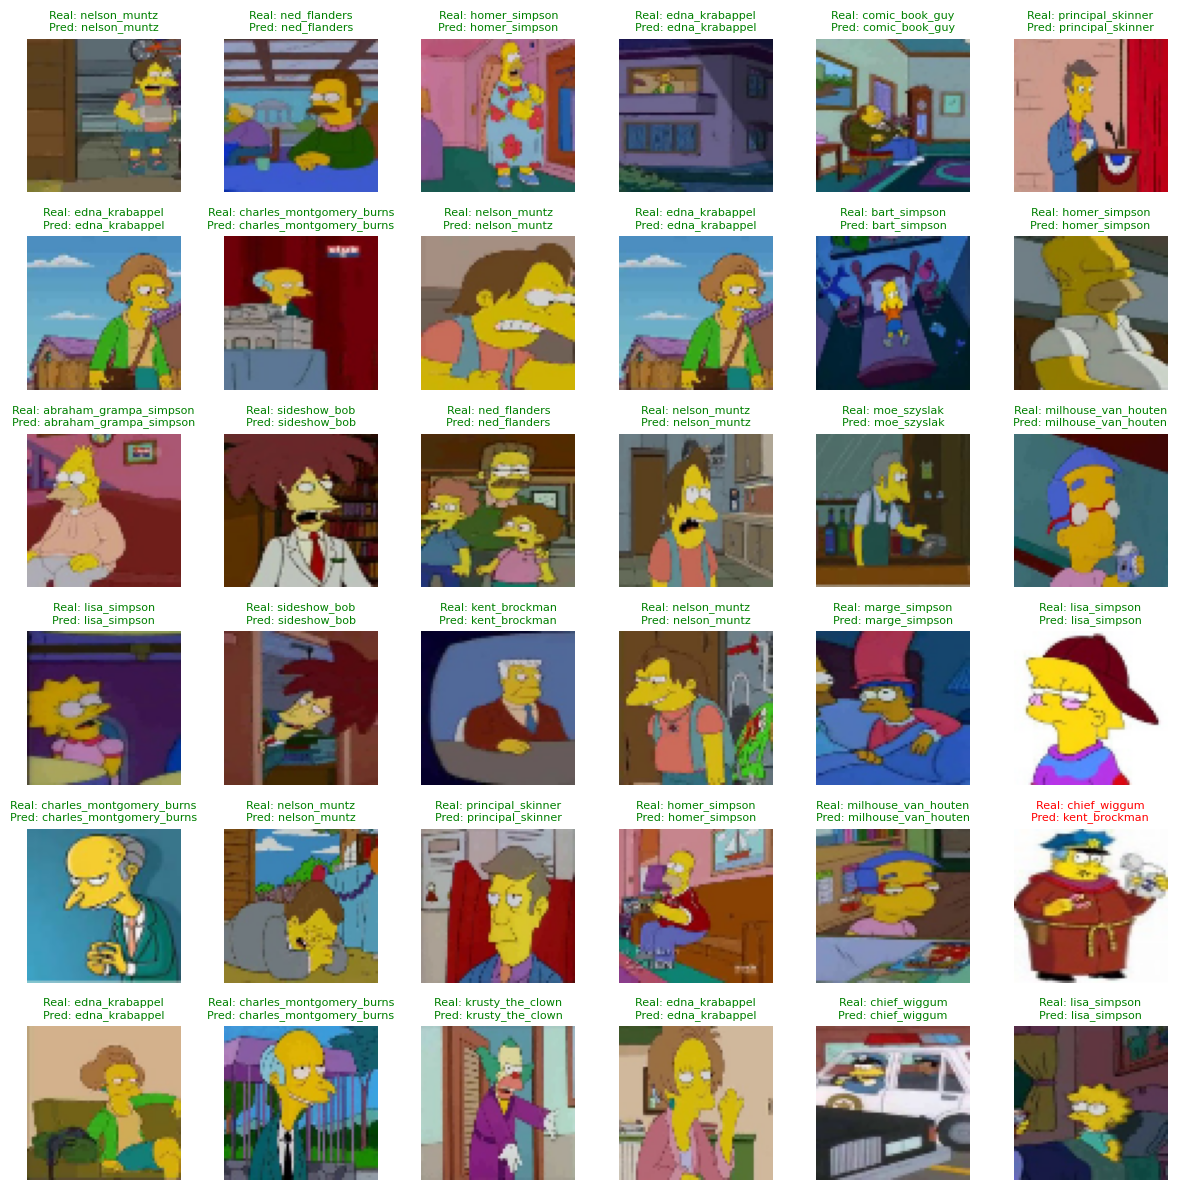

In [ ]:
num_images = 36
cols = 6
rows = (num_images + cols - 1) // cols

plt.figure(figsize=(cols * 2, rows * 2))

for i in range(num_images):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(cv2.cvtColor((X_test[i] * 255).astype("uint8"), cv2.COLOR_BGR2RGB))
    plt.axis('off')

    true_class_index = np.argmax(y_test[i])
    pred_class_index = np.argmax(cargarmodel.predict(X_test[i:i + 1])[0])

    true_label = MAP_CHARACTERS[true_class_index]
    pred_label = MAP_CHARACTERS[pred_class_index]
    color = "green" if true_class_index == pred_class_index else "red"

    # Etiquetas en líneas separadas
    plt.title(f"Real: {true_label}\nPred: {pred_label}", color=color, fontsize=8)

plt.tight_layout()
plt.show()


En la grilla de predicciones podemos observar un caso incorrecto donde el Jefe Gorgory fue clasificado erróneamente como Kent Brockman. Este error podría estar relacionado con la vestimenta, ya que Kent Brockman se distingue visualmente por su característico traje marrón. Justamente, en la imagen utilizada, el Jefe Gorgory también aparece con un traje de color marrón, lo que probablemente confundió al modelo al hacer la predicción. Esto sugiere que ciertos atributos visuales, como el color de la ropa, pueden tener un peso importante en las decisiones del modelo.

#Concluciones

Problemas con el uso de RAM:
Las arquitecturas más profundas combinadas con la técnica de Data Augmentation generaban un alto consumo de memoria RAM. Esto provocaba que, al entrenar varios modelos en una misma sesión, Colab se cerrara inesperadamente, lo que resultaba en pérdida de progreso y la necesidad de repetir las iteraciones.

Errores en las predicciones:
Las clases abraham_grampa_simpson y homer_simpson presentaron un número considerable de errores en las predicciones. Este comportamiento nos llamó la atención especialmente en el caso de homer_simpson, ya que sus imágenes eran exclusivamente reales (no extraídas de la caricatura), y esperábamos que eso favoreciera el rendimiento del modelo. Sin embargo, no fue así.

Mejor modelo:
El mejor modelo fue Tercera_red_con_aug, una red convolucional profunda que aplicó correctamente la técnica de data augmentation solo al conjunto de entrenamiento. Esta arquitectura incluyó tres bloques de capas convolucionales con padding 'same' seguidos de capas de MaxPooling, luego una etapa de flattening y tres capas densas, intercaladas con Dropout para combatir el sobreajuste. Su configuración permitió una progresión muy estable en las métricas durante el entrenamiento. Alcanzó un accuracy de validación de 0.8910, con una precision de 0.9251 y un recall de 0.8676 en solo 10 épocas. Esta red demostró una muy buena capacidad de generalización sin necesidad de técnicas como batch normalization, consolidándose como la arquitectura más equilibrada entre profundidad, regularización y rendimiento general.

Conclusiones sobre las arquitecturas:
Concluimos que aumentar la cantidad de bloques de capas convolucionales seguidas de MaxPooling mejora considerablemente las métricas de los modelos. Sin embargo, a pesar de que la técnica de Batch Normalization está diseñada para estabilizar y acelerar el aprendizaje, observamos que en nuestros casos específicos esto afectó negativamente las métricas. Por tanto, corresponde al analista decidir qué aspectos priorizar: velocidad de entrenamiento o calidad del modelo.

Importancia del Data Augmentation:
Aunque el uso de Data Augmentation no produjo los mejores resultados en todas las pruebas, sí ayudó a mejorar la capacidad de generalización de algunos modelos. A pesar de ello, incluso sin aplicar esta técnica, se lograron resultados bastante aceptables en algunos casos.

Gestión eficiente de memoria:
Durante las iteraciones, para evitar el colapso de la sesión por falta de RAM, se optó por eliminar variables o conjuntos de datos que ya no se utilizarían. Esta estrategia permitió liberar memoria y continuar agregando y evaluando nuevos modelos sin afectar el rendimiento del entorno.

Mejoras a futuro:
Para futuras iteraciones, se podrían explorar diversas mejoras tanto a nivel de arquitectura como de estrategia de entrenamiento. Por ejemplo, incorporar técnicas más avanzadas de data augmentation como transformaciones geométricas más agresivas o modificaciones de color controladas, podría ayudar a aumentar la el desempeño del modelo. También se sugiere evaluar la implementación de técnicas de reducción de overfitting como early stopping y optimizadores más avanzados como AdamW. Por último, automatizar el seguimiento de experimentos y gestión de memoria sería clave para escalar los estudios sin comprometer los recursos del entorno de ejecución.